In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


**1. car_ID**: Unique identifier for each car in the dataset.  
**2. symboling**: A risk factor rating for the car, with higher numbers indicating more risk.  
**3. CarName**: The name or model of the car.  
**4. fueltype**: Type of fuel the car uses (e.g., gasoline, diesel).  
**5. aspiration**: The method of forced induction for the engine (e.g., turbocharged or naturally aspirated).  
**6. doornumber**: The number of doors in the car (usually 2 or 4).  
**7. carbody**: The body style of the car (e.g., sedan, hatchback, convertible).  
**8. drivewheel**: Type of wheel drive (e.g., front-wheel drive, rear-wheel drive).  
**9. enginelocation**: The location of the engine (e.g., front or rear).  
**10. wheelbase**: The distance between the front and rear axles of the car.  
**11. carlength**: The total length of the car from front to back.  
**12. carwidth**: The total width of the car from side to side.  
**13. carheight**: The height of the car from the ground to the roof.  
**14. curbweight**: The weight of the car without passengers or cargo.  
**15. enginetype**: The configuration or type of the car’s engine (e.g., V-type, inline).  
**16. cylindernumber**: The number of cylinders in the engine.  
**17. enginesize**: The size of the engine, typically measured in cubic inches or liters.  
**18. fuelsystem**: The type of fuel system the car uses (e.g., multi-point fuel injection, carburetor).  
**19. boreratio**: The ratio of the diameter of the cylinder to its stroke.  
**20. stroke**: The length of the piston’s travel in the cylinder.  
**21. compressionratio**: The ratio of the volume of the cylinder at the bottom of the piston stroke to the volume at the top.  
**22. horsepower**: The power output of the engine, typically measured in horsepower.  
**23. peakrpm**: The engine speed (revolutions per minute) at which peak horsepower is produced.  
**24. citympg**: The fuel efficiency of the car in city driving conditions, measured in miles per gallon.  
**25. highwaympg**: The fuel efficiency of the car on highways, measured in miles per gallon.  
**26. price**: The price of the car.

In [2]:
df_=pd.read_csv("CarPrice_Assignment.csv")
df=df_.copy()
df_2=df_.copy()
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


here we have identify that :

1. predictor **car_ID** has no information content because it is only a indexing predictor for car


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

##b) Identify attributes/predictors that have no information content using statistical information or heuristics.

In [4]:
numerical_col=df.select_dtypes(include="number").columns #divide the numerical and categorical columns
cat_col=df.select_dtypes(include="object").columns
feat=[]
Val=[]
for i in numerical_col:
  variance=round(np.var(df[i]),2)
  feat.append(i)
  Val.append(variance)
Var_df=pd.DataFrame({"Features":feat,"Variance":Val})
Var_df

,Features,Variance
0,car_ID,3502.00
1,symboling,1.54
2,wheelbase,36.08
3,carlength,151.47
4,carwidth,4.58
5,carheight,5.94
6,curbweight,269785.40
7,enginesize,1725.65
8,boreratio,0.07
9,stroke,0.10


 For numerical columns We have checked variance of individual predictors and observe that these predictors has no or very little information in our dataset:
1. **boreratio**
2. **stroke**

In [5]:
for i in cat_col:
  val_count=round(df[i].value_counts(normalize=True),3) # calculate the proportions of every category of each column
  print()
  print(val_count)



CarName
toyota corona           0.029
toyota corolla          0.029
peugeot 504             0.029
subaru dl               0.020
mitsubishi mirage g4    0.015
                        ...  
mazda glc 4             0.005
mazda rx2 coupe         0.005
maxda glc deluxe        0.005
maxda rx3               0.005
volvo 246               0.005
Name: proportion, Length: 147, dtype: float64

fueltype
gas       0.902
diesel    0.098
Name: proportion, dtype: float64

aspiration
std      0.82
turbo    0.18
Name: proportion, dtype: float64

doornumber
four    0.561
two     0.439
Name: proportion, dtype: float64

carbody
sedan          0.468
hatchback      0.341
wagon          0.122
hardtop        0.039
convertible    0.029
Name: proportion, dtype: float64

drivewheel
fwd    0.585
rwd    0.371
4wd    0.044
Name: proportion, dtype: float64

enginelocation
front    0.985
rear     0.015
Name: proportion, dtype: float64

enginetype
ohc      0.722
ohcf     0.073
ohcv     0.063
dohc     0.059
l        0.0

**after calculating the proportion of every category we obseved that**
* fueltype
* aspiration
* enginelocation
* enginetype
* cylindernumber

**one category's proportion of these predictor is very much high than other category so these predictors  have no information content in our dataset**

##c) Impute missing values. If there are no missing values, randomly delete values to create missing values. Impute missing values using atleast two different methods and repeat step b to check how the method for imputation affected the statistics.

In [6]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


Since, Our dataset has no missing values. So first we randomly delete some values to create missing values.

In [7]:
df_sample_1=df.sample(10,random_state=42) #take the  two random observation to create 5 percent missing value of our data
df_sample_2=df.sample(10,random_state=42)
df["curbweight"]=np.where(df.index.isin(df_sample_1.index),np.nan,df["curbweight"]) #creating the missing value randomly in two column
df["enginesize"]=np.where(df.index.isin(df_sample_2.index),np.nan,df["enginesize"])
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


**We have created 10 random missing values in features "curb weight" and "engine size".**

In [8]:
df_imputed_1=df.copy()
from sklearn.impute import SimpleImputer
imp_1=SimpleImputer(missing_values=np.nan,strategy="mean")
imp_2=SimpleImputer(missing_values=np.nan,strategy="median")
df_imputed_1[["curbweight"]]=imp_1.fit_transform(df[["curbweight"]]) #imputing the missing value by using mean as strategy
df_imputed_1[["enginesize"]]=imp_2.fit_transform(df[["enginesize"]]) #imputing the missing value by using median as strategy

We have imputed around **5%** missing values of predictor **curbweight** using mean and predictor **enginesize** using median value and check statistics before and after imputation.

In [9]:
df_imputed_2=df_2.copy() #here i am creating the 10 percent missing value of my data
df_sample_3=df_2.sample(20,random_state=42)
df_sample_4=df_2.sample(20,random_state=42)
df_2["curbweight"]=np.where(df_2.index.isin(df_sample_3.index),np.nan,df_2["curbweight"])
df_2["enginesize"]=np.where(df_2.index.isin(df_sample_4.index),np.nan,df_2["enginesize"])
df_imputed_2[["curbweight"]]=imp_1.fit_transform(df_2[["curbweight"]]) #imputing the missing value by using mean as strategy
df_imputed_2[["enginesize"]]=imp_2.fit_transform(df_2[["enginesize"]]) #imputing the missing value by using median as strategy


We have imputed around **10%** missing values of predictor **curbweight** using **mean value** and predictor **enginesize** using **median value** and check statistics before and after imputation.

In [10]:
round(df.describe(),3)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,195.000,195.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,103.000,0.834,98.757,174.049,65.908,53.725,2552.508,126.882,3.330,3.255,10.143,104.117,5125.122,25.220,30.751,13276.711
std,59.323,1.245,6.022,12.337,2.145,2.444,520.080,41.895,0.271,0.314,3.972,39.544,476.986,6.542,6.886,7988.852
min,1.000,-2.000,86.600,141.100,60.300,47.800,1488.000,61.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000
25%,52.000,0.000,94.500,166.300,64.100,52.000,2145.000,97.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000,7788.000
50%,103.000,1.000,97.000,173.200,65.500,54.100,2414.000,120.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10295.000
75%,154.000,2.000,102.400,183.100,66.900,55.500,2930.500,143.000,3.580,3.410,9.400,116.000,5500.000,30.000,34.000,16503.000
max,205.000,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000


In [11]:
round(df_imputed_1.describe(),3)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,103.000,0.834,98.757,174.049,65.908,53.725,2552.508,126.546,3.330,3.255,10.143,104.117,5125.122,25.220,30.751,13276.711
std,59.323,1.245,6.022,12.337,2.145,2.444,507.173,40.882,0.271,0.314,3.972,39.544,476.986,6.542,6.886,7988.852
min,1.000,-2.000,86.600,141.100,60.300,47.800,1488.000,61.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000
25%,52.000,0.000,94.500,166.300,64.100,52.000,2190.000,98.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000,7788.000
50%,103.000,1.000,97.000,173.200,65.500,54.100,2460.000,120.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10295.000
75%,154.000,2.000,102.400,183.100,66.900,55.500,2912.000,141.000,3.580,3.410,9.400,116.000,5500.000,30.000,34.000,16503.000
max,205.000,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000


In [12]:
round(df_imputed_2.describe(),3)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,103.000,0.834,98.757,174.049,65.908,53.725,2555.724,125.751,3.330,3.255,10.143,104.117,5125.122,25.220,30.751,13276.711
std,59.323,1.245,6.022,12.337,2.145,2.444,489.709,38.398,0.271,0.314,3.972,39.544,476.986,6.542,6.886,7988.852
min,1.000,-2.000,86.600,141.100,60.300,47.800,1713.000,70.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000
25%,52.000,0.000,94.500,166.300,64.100,52.000,2191.000,98.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000,7788.000
50%,103.000,1.000,97.000,173.200,65.500,54.100,2535.000,119.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10295.000
75%,154.000,2.000,102.400,183.100,66.900,55.500,2910.000,141.000,3.580,3.410,9.400,116.000,5500.000,30.000,34.000,16503.000
max,205.000,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000


**when we imputed 5% of our data:**

for curbweight:
*  mean value did not sifted
* Std deviation in shfted by **-2.48%**.
*  the percentage change in median is **1.69 %**

for enginesize:

*   mean is shifted by **-0.60 %**
*  Std deviation in shfted by **-2.42%**.
*   median value did not change

**when we imputed 10% of our data:**

for curbweight:

*  mean is shifted by **0.12 %**
*  Std deviation in shfted by **-5.83%**.
*  the percentage change in median is **3.90 %**

for enginesize:

*   mean is shifted by **0.66 %**
*  Std deviation in shfted by **-8.34%**.
*   percentage change in median is **8.10 %**

1. **As we imputed more values using mean value the data gathered around mean and deviation is decreased.**
2. **As we imputed more values using median value  the data gathered around mean,more as compared to mean imputaion, and deviation is decreased.**


##(d) Identify outliers using univariate methods

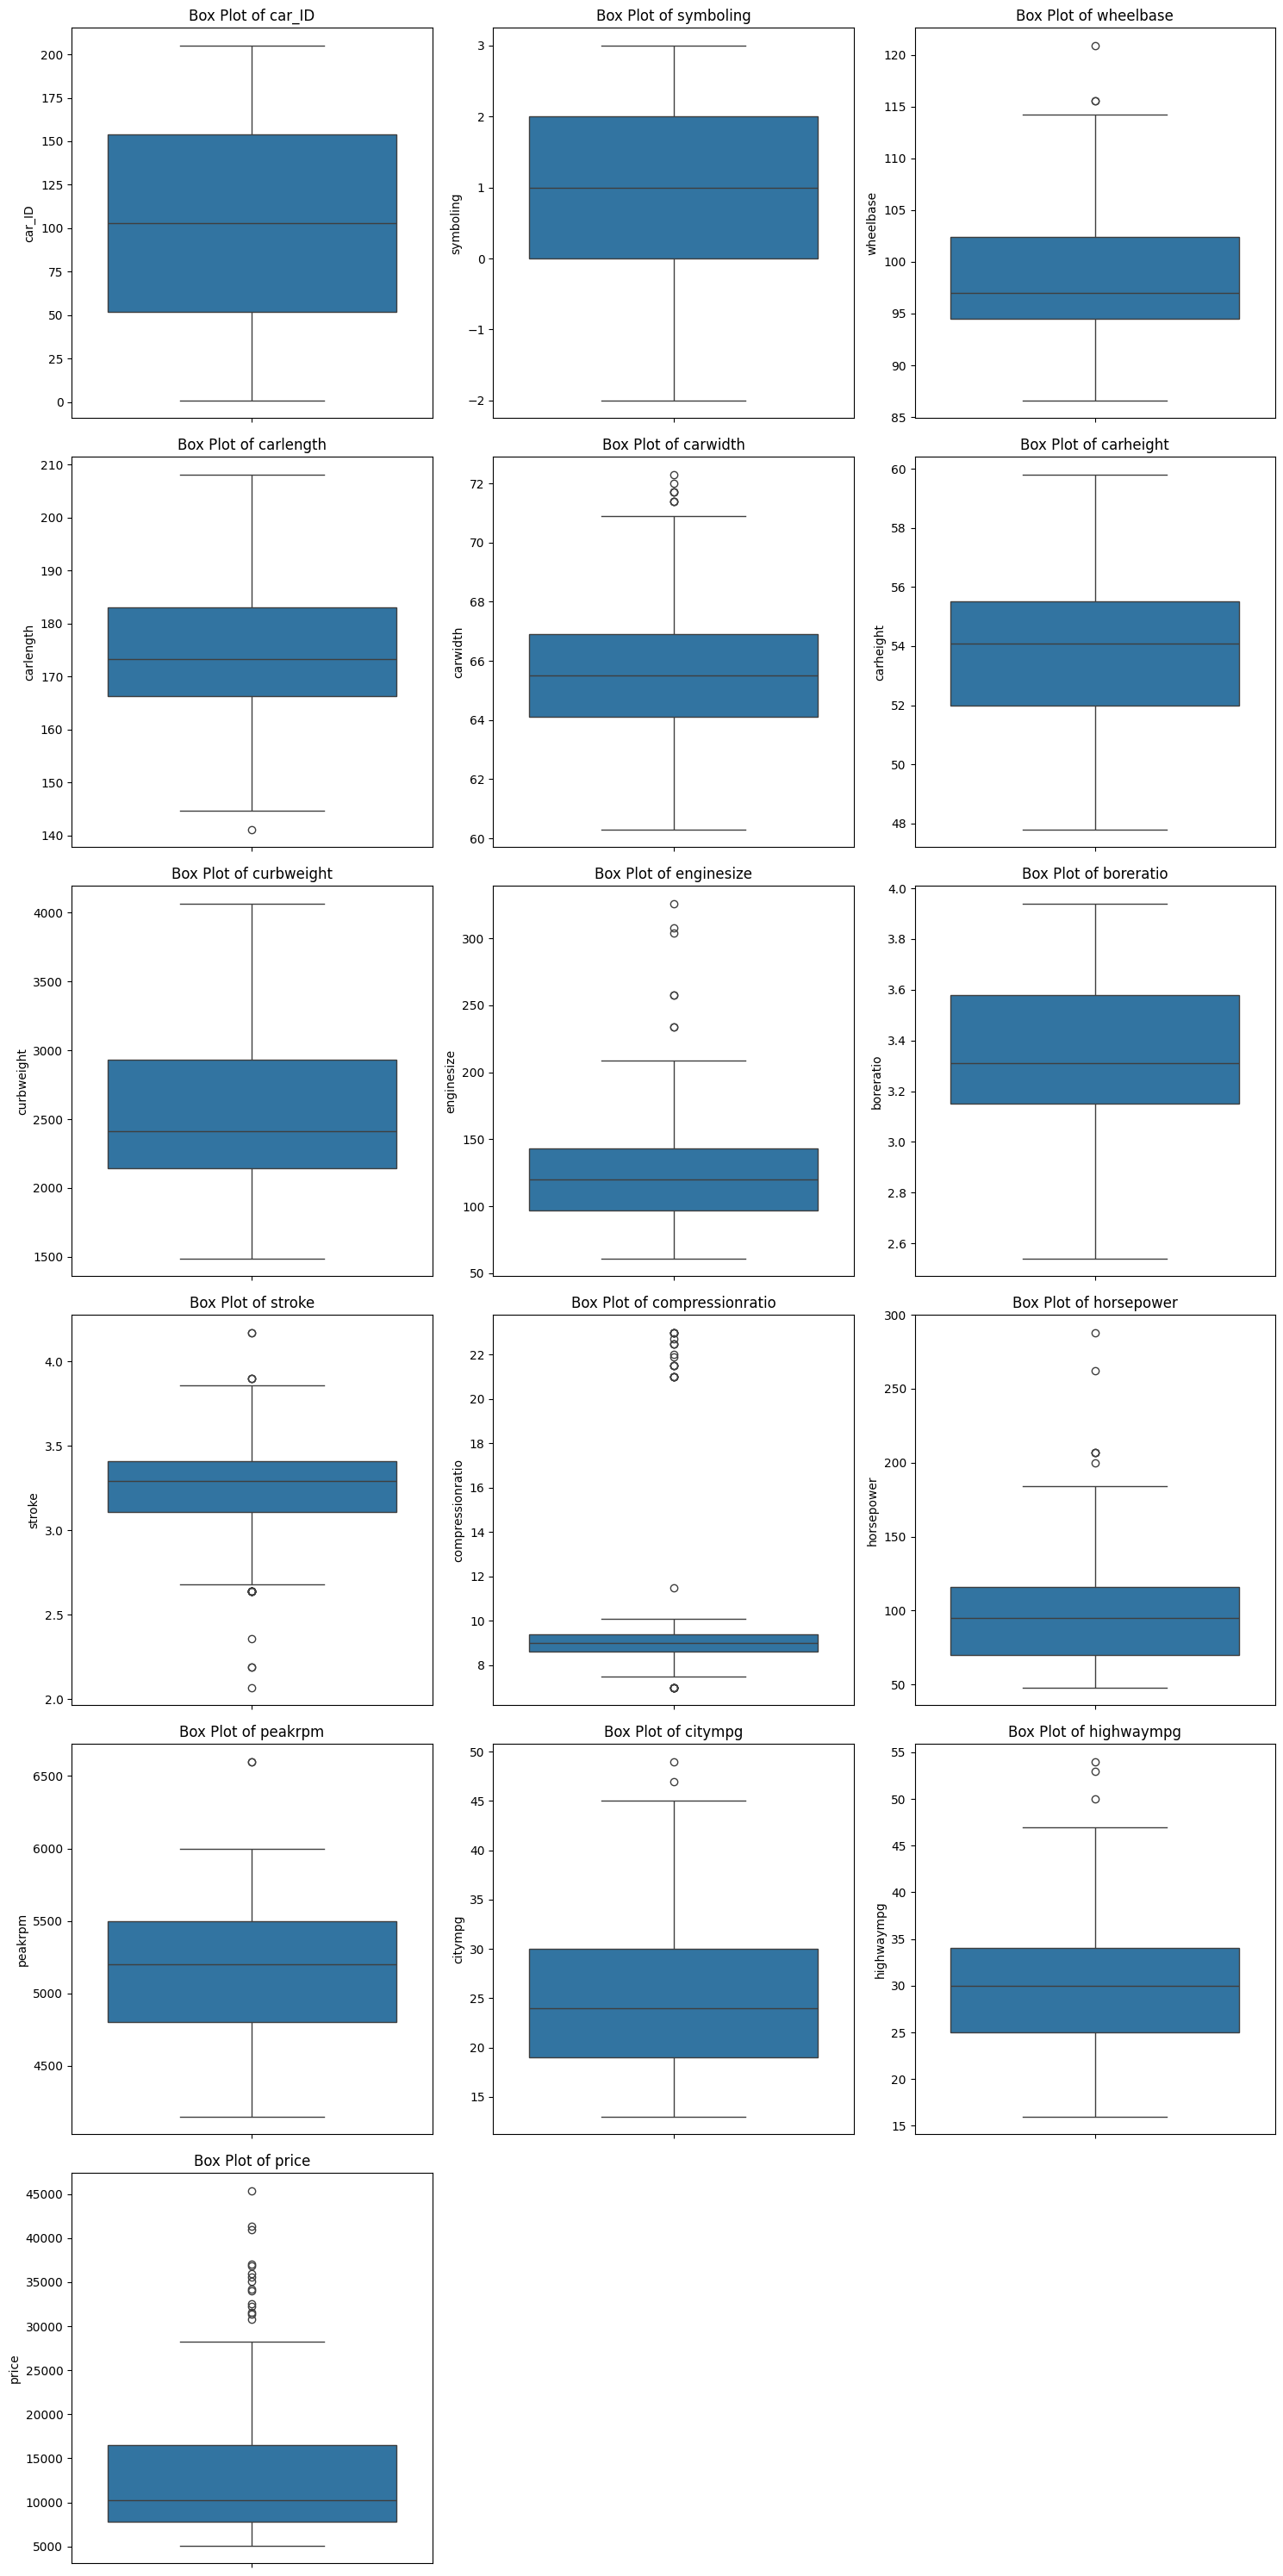

In [13]:
df_num_col = df.select_dtypes(include="number").columns #Plotting Bar graphs of numerical columns
num_columns = len(df_num_col)
nrows = (num_columns // 3) + (num_columns % 3 > 0)
ncols = min(num_columns, 3)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(df_num_col):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


By ploting Box plot we have found that below predictors have **outliers**.


1.   Wheel base
2.   Car width
3.   engine size
4.   stroke
5.  compression ratio
6.  horsepower
7.  peakrpm
8.  citympg
9.  higwaympg
10. price


In [14]:
def outliers(df, df_num_col): #Detecting the Min Max and No. of outliers in data
    lower_lim = []
    upper_lim = []
    outlier_num = []
    for col in df_num_col:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_lim = round((Q1 - 1.5 * IQR), 0)
        Upper_lim = round((Q3 + 1.5 * IQR), 0)
        lower_lim.append(Lower_lim)
        upper_lim.append(Upper_lim)
        outliers_in_column = df[(df[col] < Lower_lim) | (df[col] > Upper_lim)]
        outlier_num.append(len(outliers_in_column))
    outlier_df = pd.DataFrame({
        'Column': df_num_col,
        'Lower Limit': lower_lim,
        'Upper Limit': upper_lim,
        'No of Outliers': outlier_num
    })

    return outlier_df



outliers(df,df_num_col)

,Column,Lower Limit,Upper Limit,No of Outliers
0,car_ID,-101.0,307.0,0
1,symboling,-3.0,5.0,0
2,wheelbase,83.0,114.0,7
3,carlength,141.0,208.0,1
4,carwidth,60.0,71.0,8
5,carheight,47.0,61.0,0
6,curbweight,967.0,4109.0,0
7,enginesize,28.0,212.0,7
8,boreratio,3.0,4.0,23
9,stroke,3.0,4.0,26


**Here, we have shown the upper limit,lower limit and number of data instances which are outliers in each features.**

##(e) Identify skewness in features and apply transformation if required. Compute skewness again. Write your observation

In [15]:
skewness={}                            #Checking the Skewness of data
for i in df_num_col:
  s=df[i].skew()
  skewness[i]=s

feature=[]
Val=[]
Skew_type=[]
for key, value in skewness.items():
  feature.append(key)
  Val.append(value)
  t=1
  if value>0.5:
    t=2
  if value<-0.5:
    t=3
  if t==1:
    ty="Normal"
  if t==2:
    ty="Positively skewed"
  if t==3:
    ty="Negatively Skewed"
  Skew_type.append(ty)
Skew_df=pd.DataFrame({"Feature":feature,"Skewness":Val,"Nature":Skew_type})
Skew_df

,Feature,Skewness,Nature
0,car_ID,0.000000,Normal
1,symboling,0.211072,Normal
2,wheelbase,1.050214,Positively skewed
3,carlength,0.155954,Normal
4,carwidth,0.904003,Positively skewed
5,carheight,0.063123,Normal
6,curbweight,0.668647,Positively skewed
7,enginesize,1.968792,Positively skewed
8,boreratio,0.020156,Normal
9,stroke,-0.689705,Negatively Skewed


By checking Skewness we have found:

1.   **Normally Distrubuted features are:**

* car_ID
* symboling
* carlength
* carheight
* boreratio
* peakrpm

2.  **Positively Skewed features are:**


* Wheelbase
* carwidth
* curbweight
* enginesize
* compressionratio
* horsepower
* citympg
* highwaympg
* price

3. **Negatively Skewed features are:**

*   stroke


In [16]:
Skew_norm=Skew_df[Skew_df["Nature"]=="Normal"]
Skew_pos=Skew_df[Skew_df["Nature"]=="Positively skewed"]
Skew_neg=Skew_df[Skew_df["Nature"]=="Negatively Skewed"]

Skew_pos_col=list(Skew_pos["Feature"])
Skew_neg_col=list(Skew_neg["Feature"])

from sklearn.preprocessing import PowerTransformer                  #apply function transformation on skewed fetaures
trans=PowerTransformer()
df_trans=df.copy()
df_trans[Skew_pos_col]=trans.fit_transform(df[Skew_pos_col])
df_trans[Skew_neg_col]=trans.fit_transform(df[Skew_neg_col])

In [17]:
skewness={}                            #Comaprision on skewness Before and After Transformation
for i in df_num_col:
  s=df_trans[i].skew()
  skewness[i]=s

feature=[]
Val=[]
Skew_type=[]
for key, value in skewness.items():
  feature.append(key)
  Val.append(value)
  t=1
  if value>0.5:
    t=2
  if value<-0.5:
    t=3
  if t==1:
    ty="Normal"
  if t==2:
    ty="Positively skewed"
  if t==3:
    ty="Negatively Skewed"
  Skew_type.append(ty)
Skew_df_trans=pd.DataFrame({"Feature":feature,"Skewness After Transformation":Val,"Nature After Transformation":Skew_type})
pd.concat([Skew_df,Skew_df_trans.drop("Feature",axis=1)],axis=1)

,Feature,Skewness,Nature,Skewness After Transformation,Nature After Transformation
0,car_ID,0.000000,Normal,0.000000,Normal
1,symboling,0.211072,Normal,0.211072,Normal
2,wheelbase,1.050214,Positively skewed,-0.003485,Normal
3,carlength,0.155954,Normal,0.155954,Normal
4,carwidth,0.904003,Positively skewed,0.000000,Normal
5,carheight,0.063123,Normal,0.063123,Normal
6,curbweight,0.668647,Positively skewed,0.023227,Normal
7,enginesize,1.968792,Positively skewed,-0.003278,Normal
8,boreratio,0.020156,Normal,0.020156,Normal
9,stroke,-0.689705,Negatively Skewed,0.112143,Normal


After Applying Transformation, We have observed:


*  All the Skewed Features became Normally distrubuted.

##(f) Visualize the data by creating scatter plots, and distribution plots. Write your observations about the data.

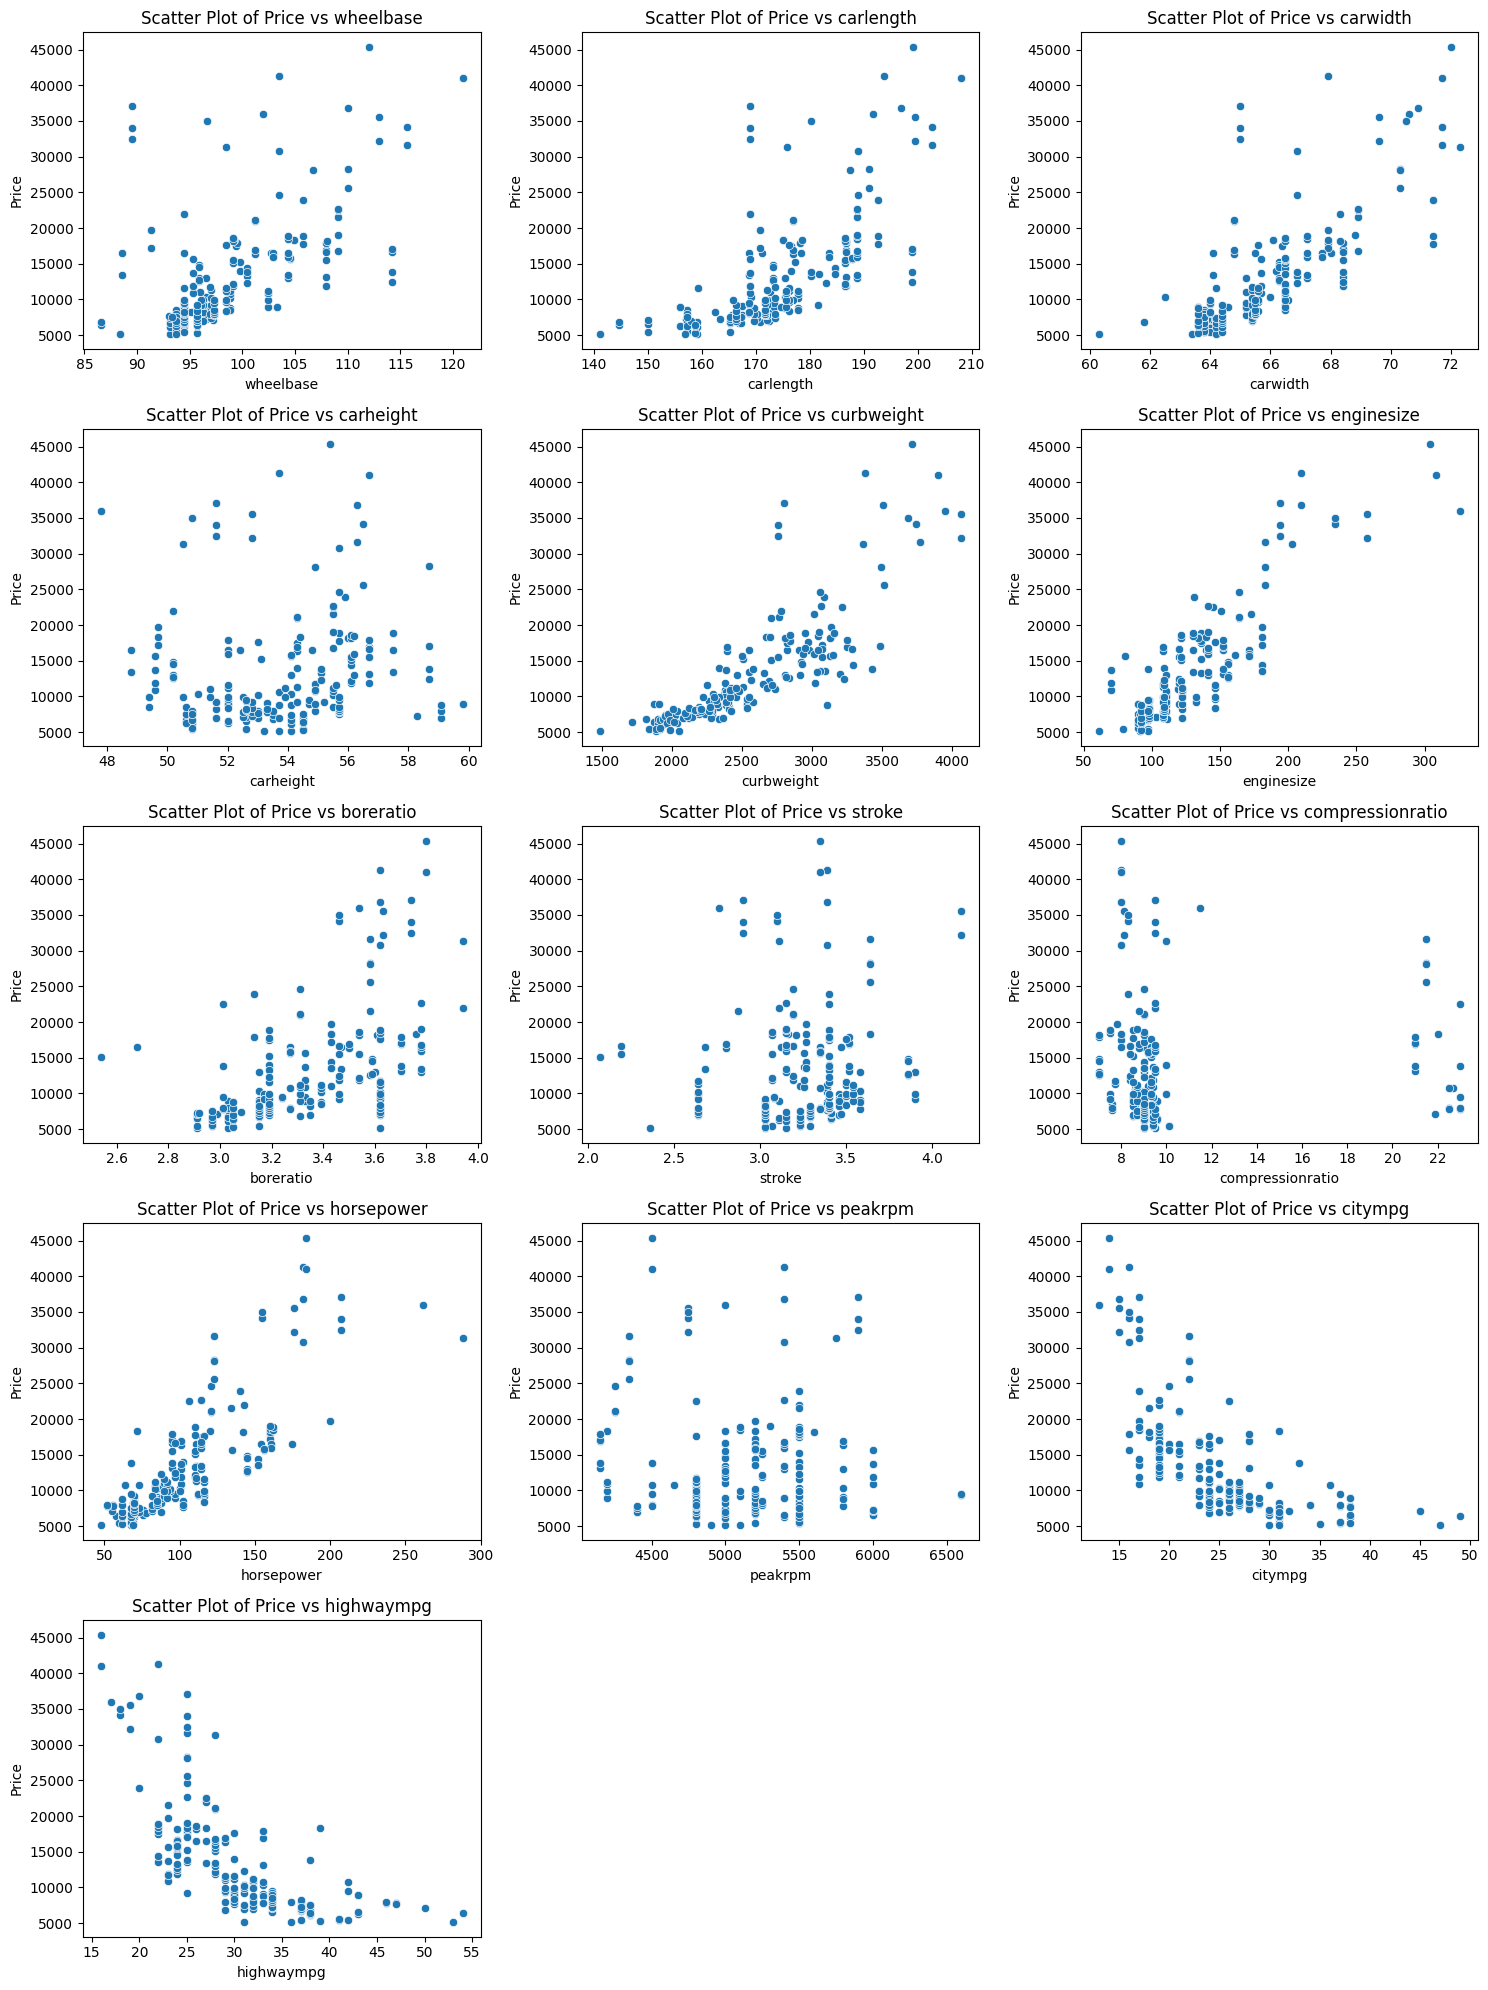

In [18]:
df_ind_col=df.drop(["car_ID","symboling","price"],axis=1).select_dtypes(include="number").columns    #Plotting scatter plot of Target VS features
num_columns = len(df_ind_col)
nrows = (num_columns // 3) + (num_columns % 3 > 0)
ncols = min(num_columns, 3)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(df_ind_col):
    sns.scatterplot(data=df, x=col, y="price", ax=axes[i])
    axes[i].set_title(f'Scatter Plot of Price vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Price Increases as there is increase in values of below features:**
1. Wheel base
2. Car Width
3. Car Length
4. Curb Weight
5. Engine Size
6. Bore ratio
7. Horsepower

* This indicates that Big Size cars have higher price.
* Price increase with increase in car speed.

**Price decrease as there is increase in values of below features:**

1. Citympg
2. highwaympg

* This indicates that as the fuel efficiency increases the Price goes down (let' See further what is happening).


**Price is higher for Compression ratio range (6-10) as compare to compression ratio above 21.**

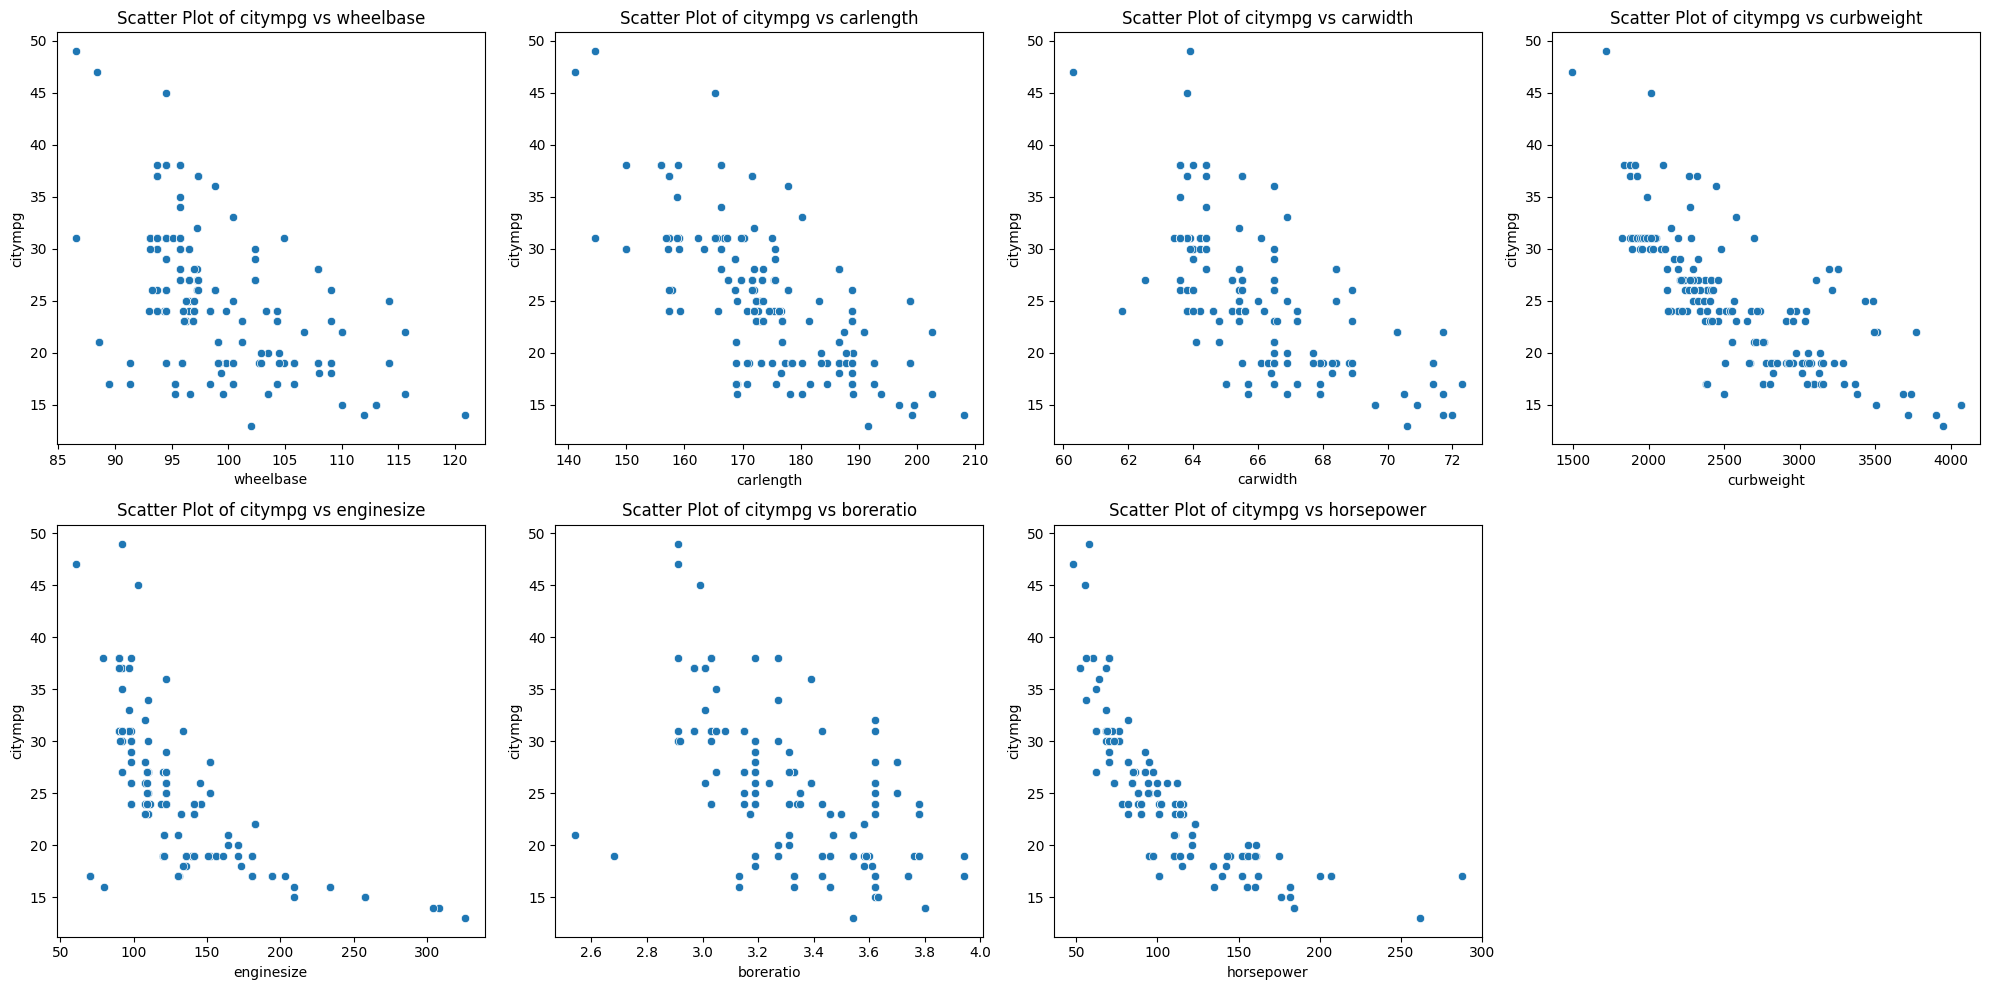

In [19]:
price_inc=["wheelbase",'carlength','carwidth','curbweight','enginesize','boreratio','horsepower'] #Scatter plot of efficiency parameter Vs rest of Features
price_dec=['citympg','highwaympg']
num_columns = len(price_inc)
nrows = (num_columns // 4) + (num_columns % 4 > 0)
ncols = min(num_columns, 4)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(price_inc):
    sns.scatterplot(data=df, x=col, y="citympg", ax=axes[i])
    axes[i].set_title(f'Scatter Plot of citympg vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('citympg')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Fuel Efficiency of car is decreasing with increase in**

1. Car Size
2. Engine Size
3. Horsepower

* **Fuel Efficiency is maximum at bore ratio between 2.8 - 3.0, above 3.0 its starts decreasing.**
* **Fuel Efficiency is effecting price indirectly, As Car Size and speed increase Price is increases and fuel efficiency decreases.**


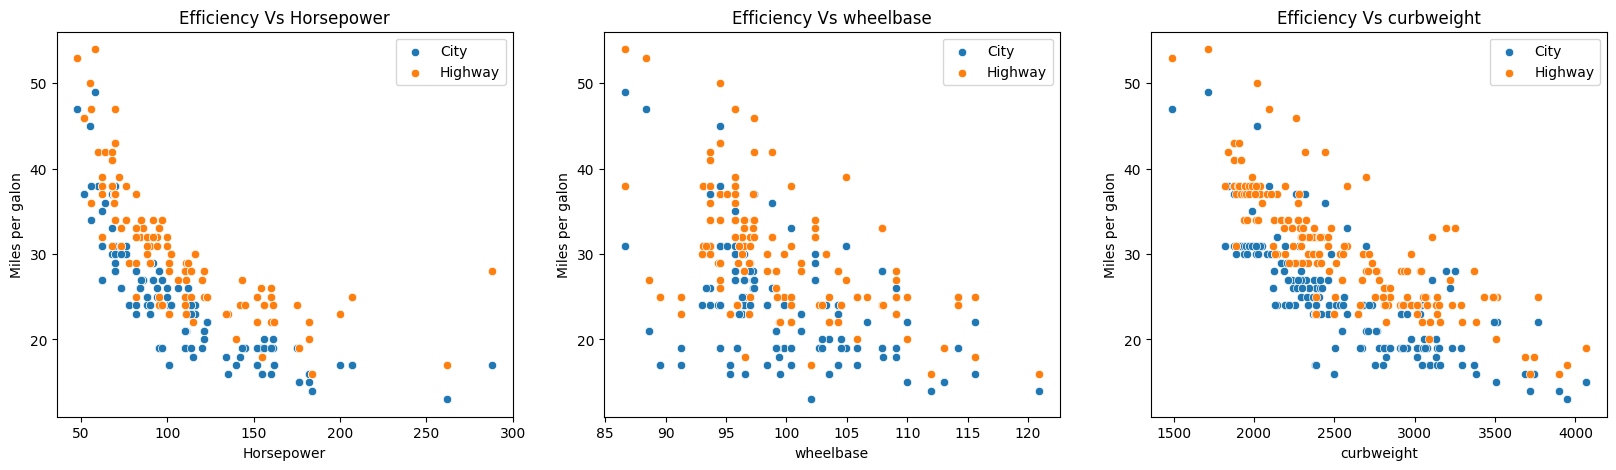

In [20]:
plt.figure(figsize=(20,5))                                               #Plotting scatter plot of Efficiency Vs horsepower,weight and length features
plt.subplot(131)
sns.scatterplot(data=df,y="citympg",x="horsepower",label="City")
sns.scatterplot(data=df,y="highwaympg",x="horsepower",label="Highway")
_=plt.xlabel("Horsepower")
_=plt.ylabel("Miles per galon")
_=plt.title("Efficiency Vs Horsepower")

plt.subplot(132)
sns.scatterplot(data=df,y="citympg",x="wheelbase",label="City")
sns.scatterplot(data=df,y="highwaympg",x="wheelbase",label="Highway")
_=plt.xlabel("wheelbase")
_=plt.ylabel("Miles per galon")
_=plt.title("Efficiency Vs wheelbase")

plt.subplot(133)
sns.scatterplot(data=df,y="citympg",x="curbweight",label="City")
sns.scatterplot(data=df,y="highwaympg",x="curbweight",label="Highway")
_=plt.xlabel("curbweight")
_=plt.ylabel("Miles per galon")
_=plt.title("Efficiency Vs curbweight")

* **Efficiency of car is better on highway as comapred to city**.
* **With increase in horsepower the difference in efficiency at highway to city increases.**

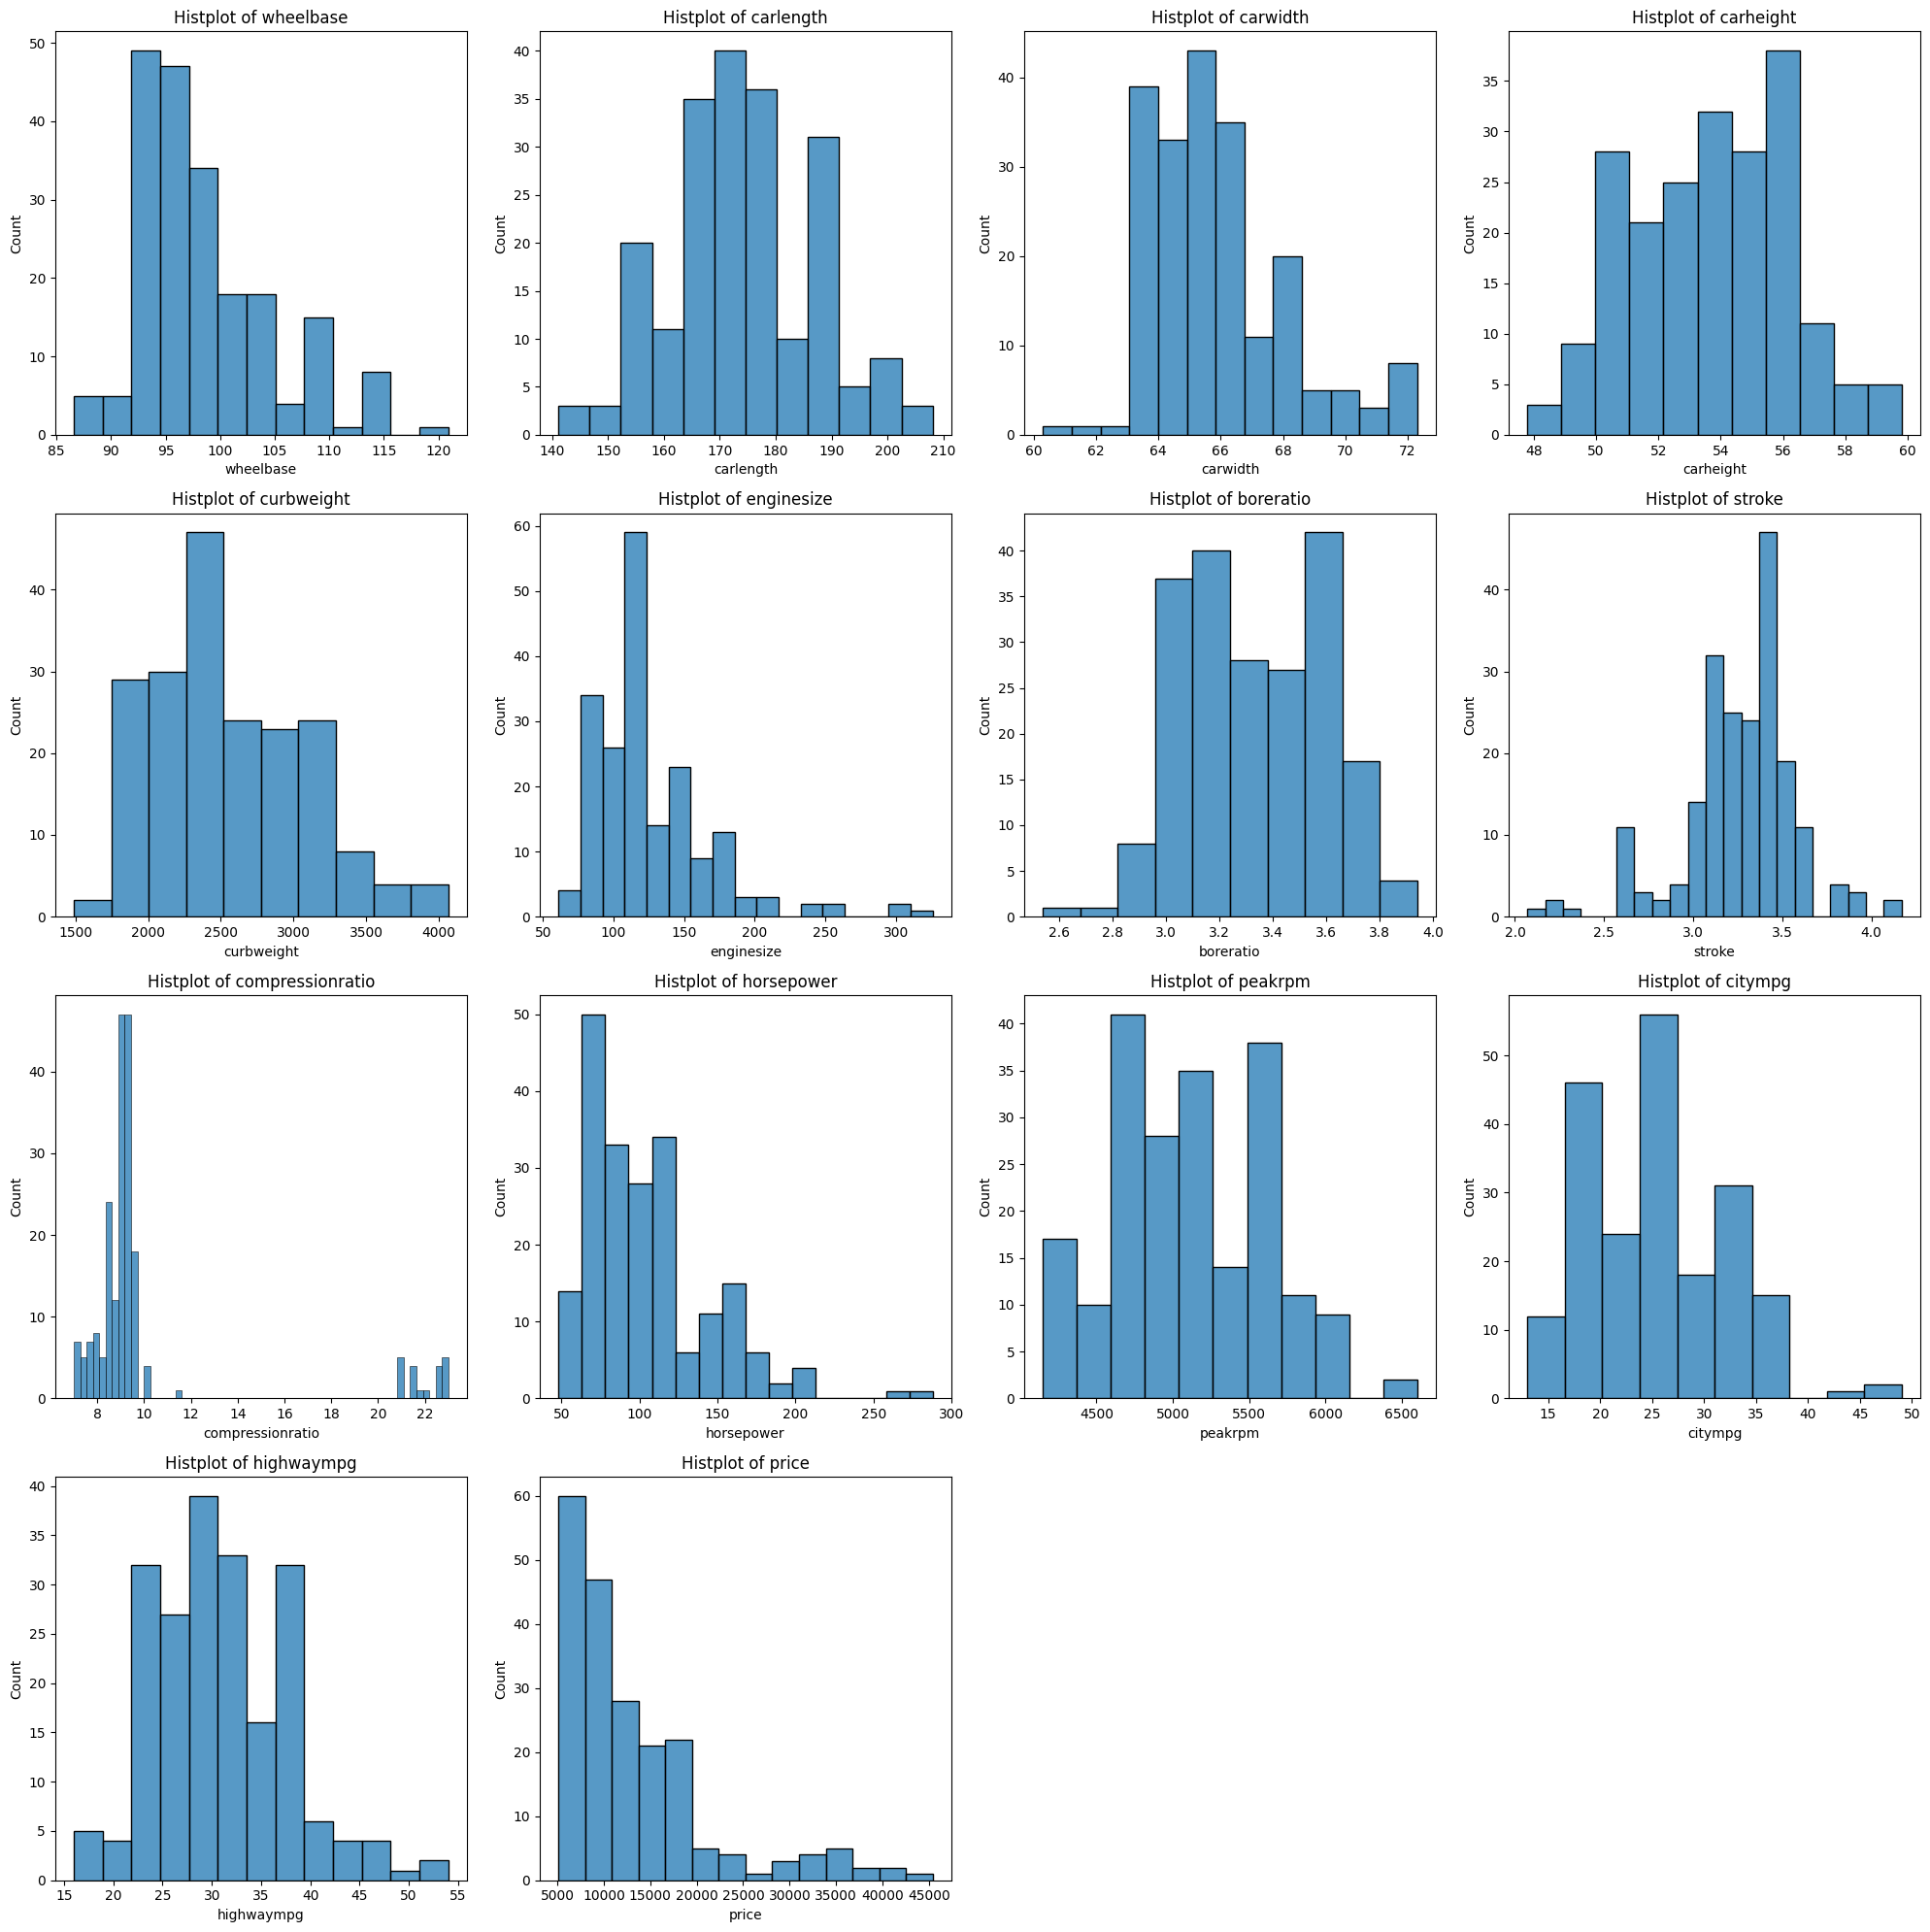

In [21]:
num_columns = len(df_num_col[2:])                                            #Plotting histogram of fetaures
nrows = (num_columns // 4) + (num_columns % 4 > 0)
ncols = min(num_columns, 4)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(df_num_col[2:]):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(f'Histplot of {col}')
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

After plotting Histplot We have observe that the most frequent values for below feature are around:
1. Wheelbase- **92-100**
2. Car length- **160-190**
3. Car Width- **63-68**
4. Car height- **50-56**
5. Curbweight- **1800-3200**
6. Engine Size- **100-150**
7. Bore ratio- **3-3.6**
8. Stoke- **3-3.5**
9. Compression ratio- **8-10**
10. Horsepower- **65-120**
11. Peakrpm- **4500-5500**
12. city mpg- **15-35**
13. Highway mpg- **20-40**
14. Price- **5000-20000**


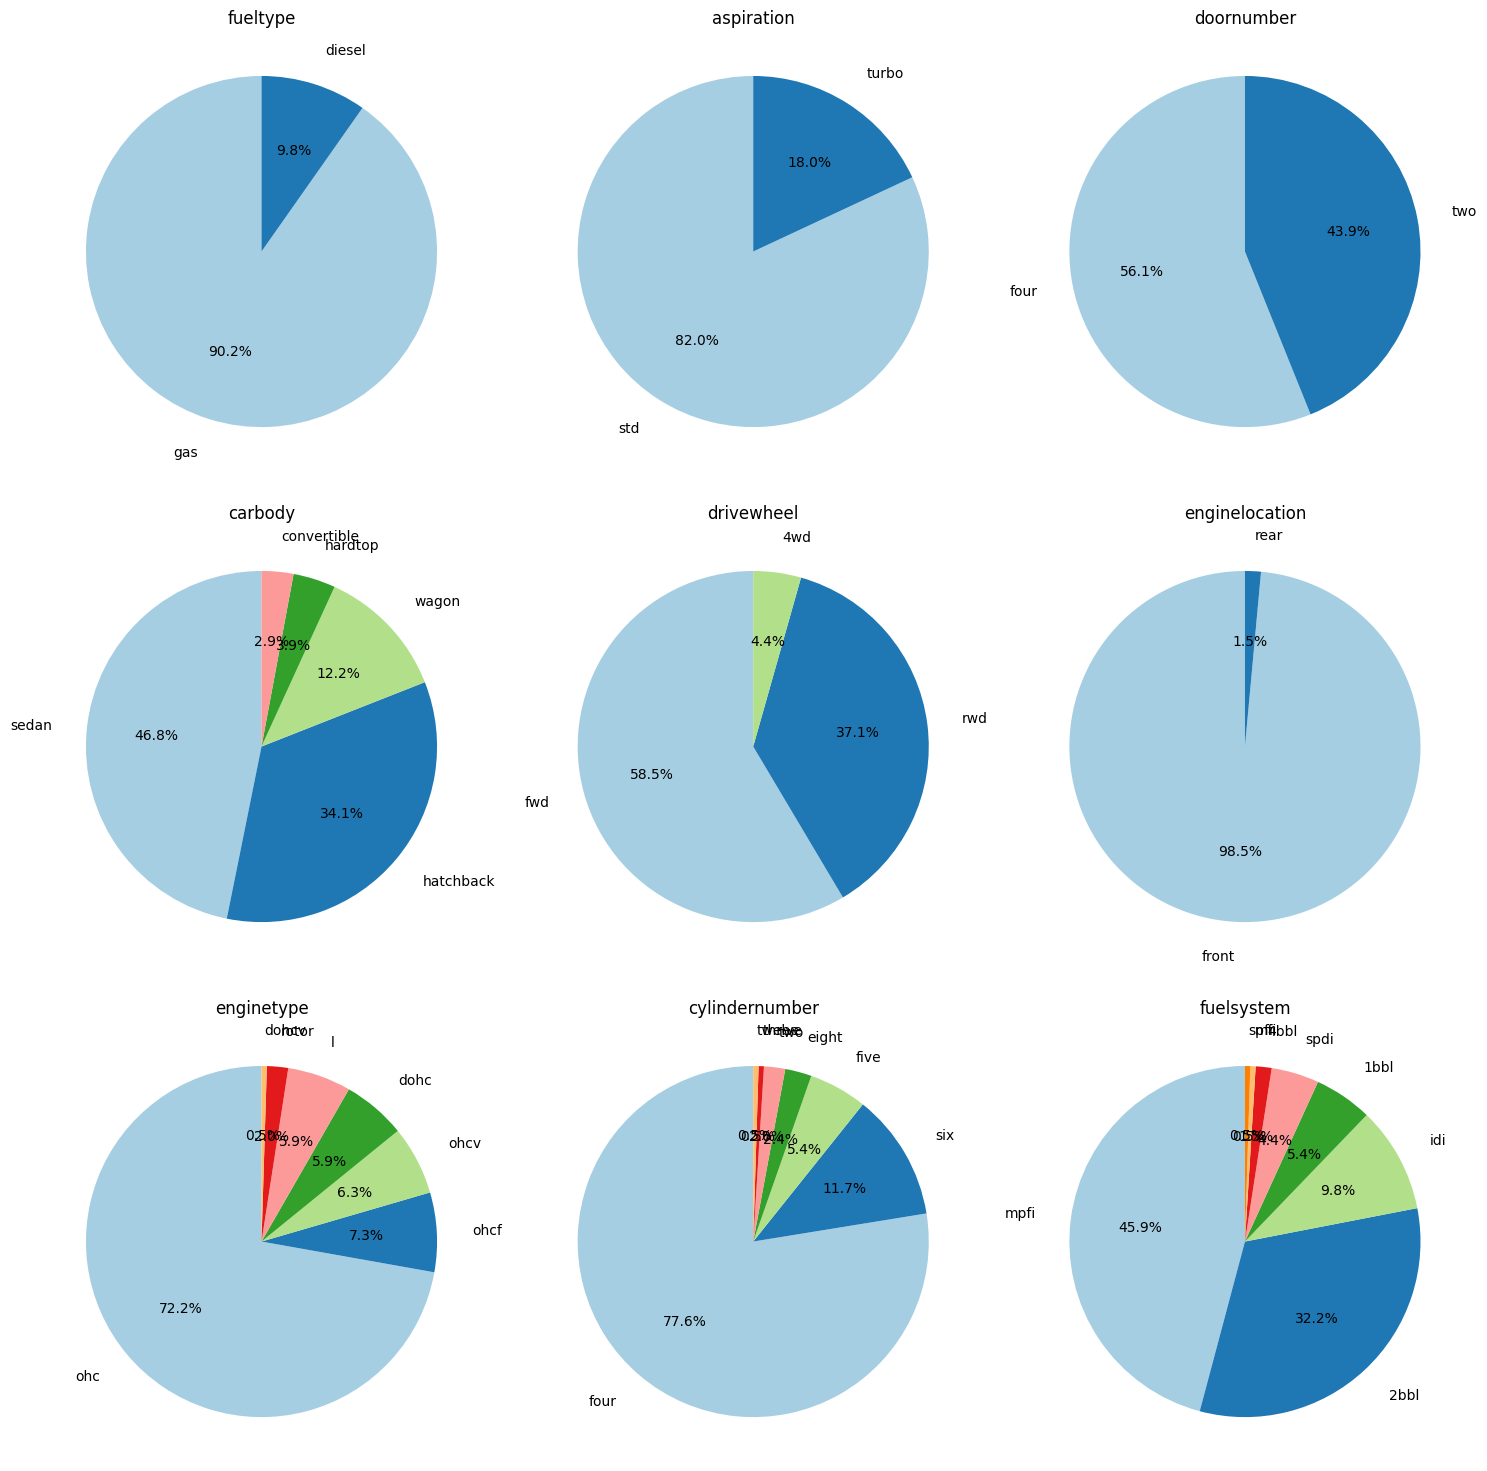

In [22]:
df_cat_col=df.select_dtypes(include="object").columns                             #Pie chart of categorical features
num_columns = len(df_cat_col[1:])
nrows = (num_columns // 3) + (num_columns % 3 > 0)
ncols = min(num_columns, 3)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()
for i, col in enumerate(df_cat_col[1:]):
  axes[i].pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%', startangle=90,
            labeldistance=1.2,colors=plt.cm.Paired.colors)
  axes[i].set_title(f'{col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

* Majority of Car fuel type is gas**(90.2%)**
* Majority of Car aspiration is std**(82.0%)**
* The ratio of two and four door cars are almost equal **(43.9% and 56.1%)**
* Majority of carbody are Sedan and hatchback **(46.8% and 34.1%)**
* Majority of Drivewheel are fwd and rwd **(58.5% and 37.1%)**
* Almost all engine location is front**(98.5%)**
* Majority of engine type is ohc**(72.2%)**
* Majority of Car has four cyinders**(77.6%)**
* Most of the Cars have mpfi and 2bbl Fuel system **(45.9% and 32.2%)**

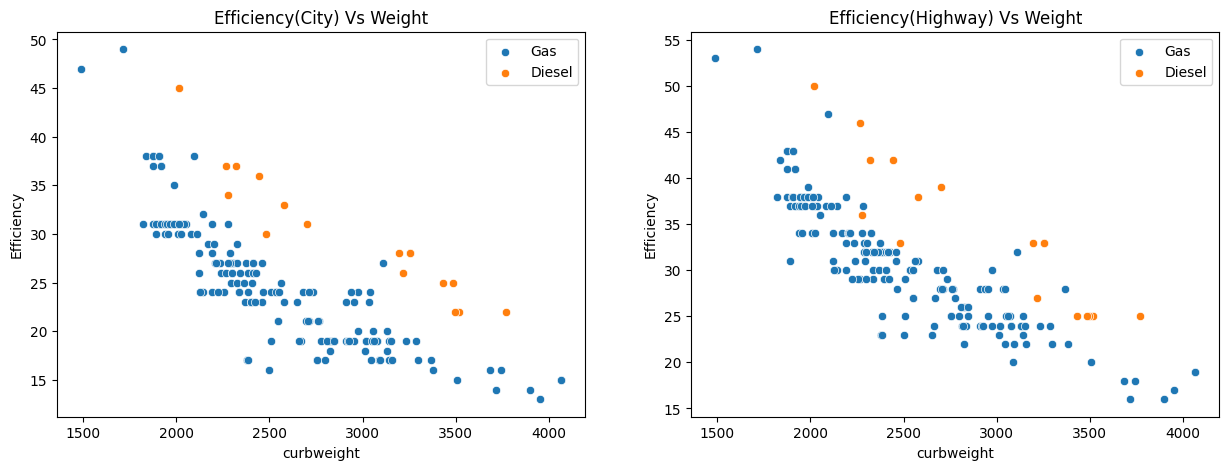

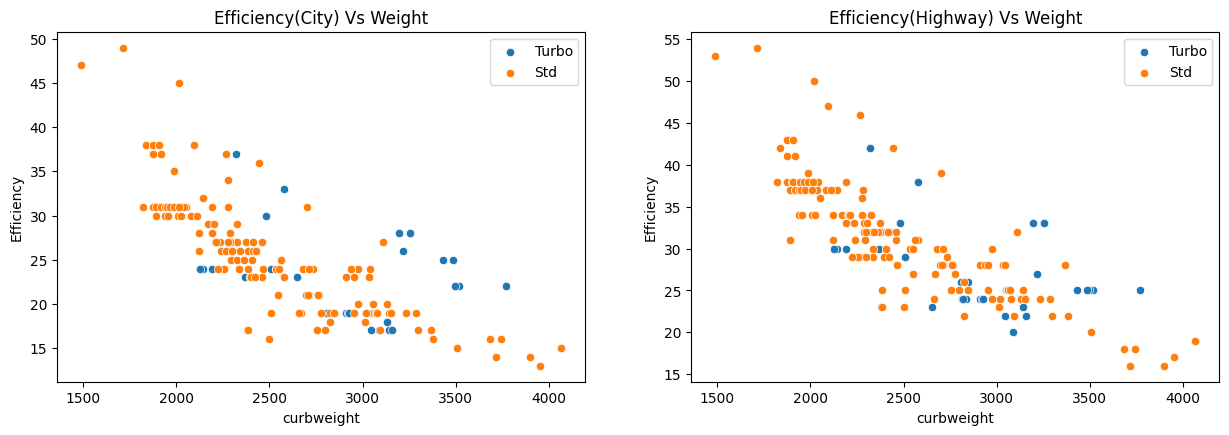

In [23]:
plt.figure(figsize=(15,5))                                                                       #Effect of fuel type on efficiency with incease in weight
plt.subplot(121)
sns.scatterplot(data=df[df["fueltype"]=="gas"],x="curbweight",y="citympg",label="Gas")
sns.scatterplot(data=df[df["fueltype"]=="diesel"],x="curbweight",y="citympg",label="Diesel")
plt.title("Efficiency(City) Vs Weight")
_=plt.ylabel("Efficiency")

plt.subplot(122)
sns.scatterplot(data=df[df["fueltype"]=="gas"],x="curbweight",y="highwaympg",label="Gas")
sns.scatterplot(data=df[df["fueltype"]=="diesel"],x="curbweight",y="highwaympg",label="Diesel")
plt.title("Efficiency(Highway) Vs Weight")
_=plt.ylabel("Efficiency")

plt.figure(figsize=(15,10))
plt.subplot(221)
sns.scatterplot(data=df[df["aspiration"]=="turbo"],x="curbweight",y="citympg",label="Turbo")
sns.scatterplot(data=df[df["aspiration"]=="std"],x="curbweight",y="citympg",label="Std")
plt.title("Efficiency(City) Vs Weight")
_=plt.ylabel("Efficiency")

plt.subplot(222)
sns.scatterplot(data=df[df["aspiration"]=="turbo"],x="curbweight",y="highwaympg",label="Turbo")
sns.scatterplot(data=df[df["aspiration"]=="std"],x="curbweight",y="highwaympg",label="Std")
plt.title("Efficiency(Highway) Vs Weight")
_=plt.ylabel("Efficiency")

1. **Cars with Diesel fuel type are more efficient in city as well as on highway as compare to Gas fuel type**
2. **As the weight of car increases turbo Aspiration type is more efficient than std type.**


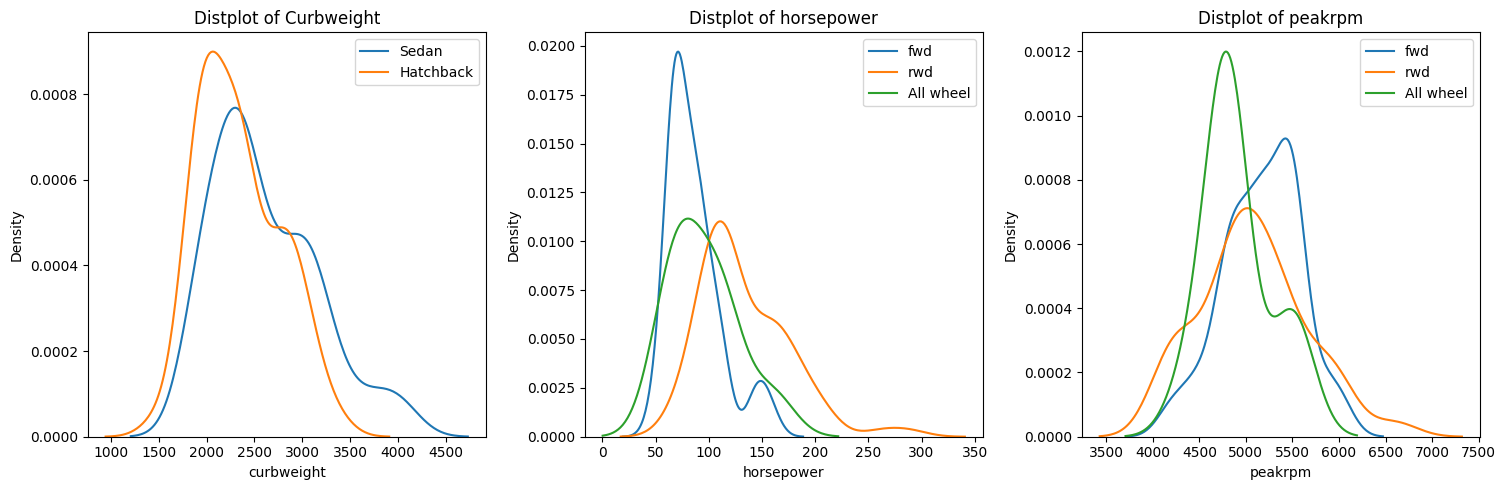

In [24]:
plt.figure(figsize=(15,5))                                                                       #Plotting distplot to see effect of bodytype and drivewheel on distribution of weight,speed and accelearation
plt.subplot(131)
sns.distplot(df[df["carbody"]=="sedan"]["curbweight"],hist=False,label="Sedan")
sns.distplot(df[df["carbody"]=="hatchback"]["curbweight"],hist=False,label="Hatchback")
plt.title("Distplot of Curbweight")
_=plt.legend()

plt.subplot(132)
sns.distplot(df[df["drivewheel"]=="fwd"]["horsepower"],hist=False,label="fwd")
sns.distplot(df[df["drivewheel"]=="rwd"]["horsepower"],hist=False,label="rwd")
sns.distplot(df[df["drivewheel"]=="4wd"]["horsepower"],hist=False,label="All wheel")
plt.title("Distplot of horsepower")
_=plt.legend()

plt.subplot(133)
sns.distplot(df[df["drivewheel"]=="fwd"]["peakrpm"],hist=False,label="fwd")
sns.distplot(df[df["drivewheel"]=="rwd"]["peakrpm"],hist=False,label="rwd")
sns.distplot(df[df["drivewheel"]=="4wd"]["peakrpm"],hist=False,label="All wheel")
plt.title("Distplot of peakrpm")
_=plt.legend()
plt.tight_layout()
plt.show()

1. **Cars with Sedan body are heavier than Hatchback.**
2. **Cars with Rear wheel drive has better acceleration and speed.**

##(g) Do One-Hot Encoding for the categorical predictors. How many predictors do you have after doing one hot encoding?

In [25]:
from sklearn.preprocessing import OneHotEncoder               #import the onhotencoder class for one hot encoding
ohe=OneHotEncoder(drop="first",sparse_output=False)
df_f=ohe.fit_transform(df[cat_col])
df_ohe=pd.DataFrame(df_f,columns=ohe.get_feature_names_out(cat_col)) #convert out dataset into dataframe because onhotencoding give in nd array
df_final=pd.concat([df_,df_ohe],axis=1)
print(f"The Number of predictors after one hot encoding are {len(df_final.columns)}")                    #calculating the total feature in our dataset after onhot encoding


The Number of predictors after one hot encoding are 201


**The Number of predictors after one hot encoding are 201**


##h) Create a heatmap to visualize the correlation between all variable pairs.

<Axes: >

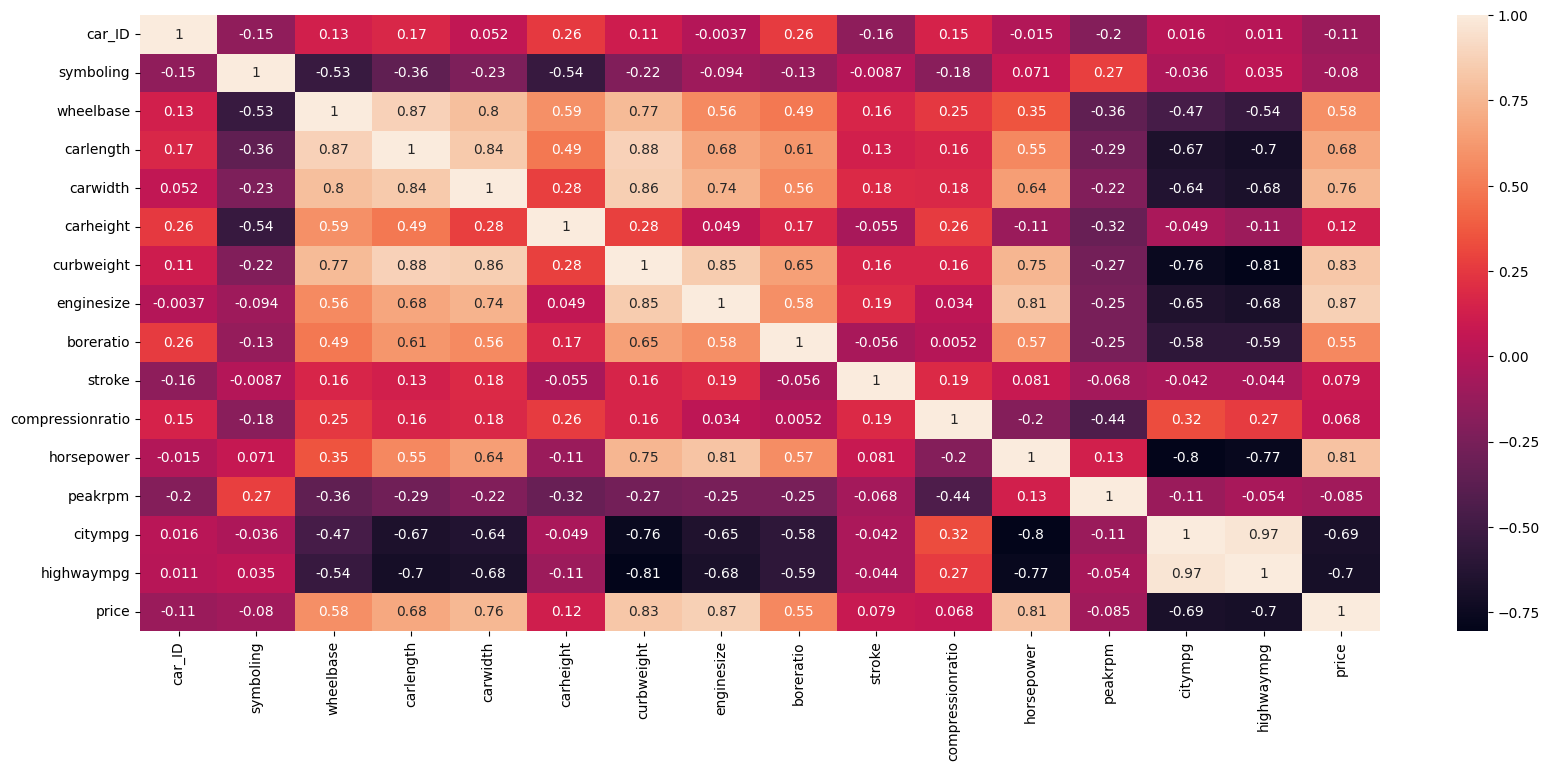

In [26]:
cor=df.select_dtypes(include="number").corr()                             #Creating the heatmap to visualise correlation matrix
plt.figure(figsize=(20,8))
sns.heatmap(cor,annot=True)

##(i) Identify high-correlation feature pairs

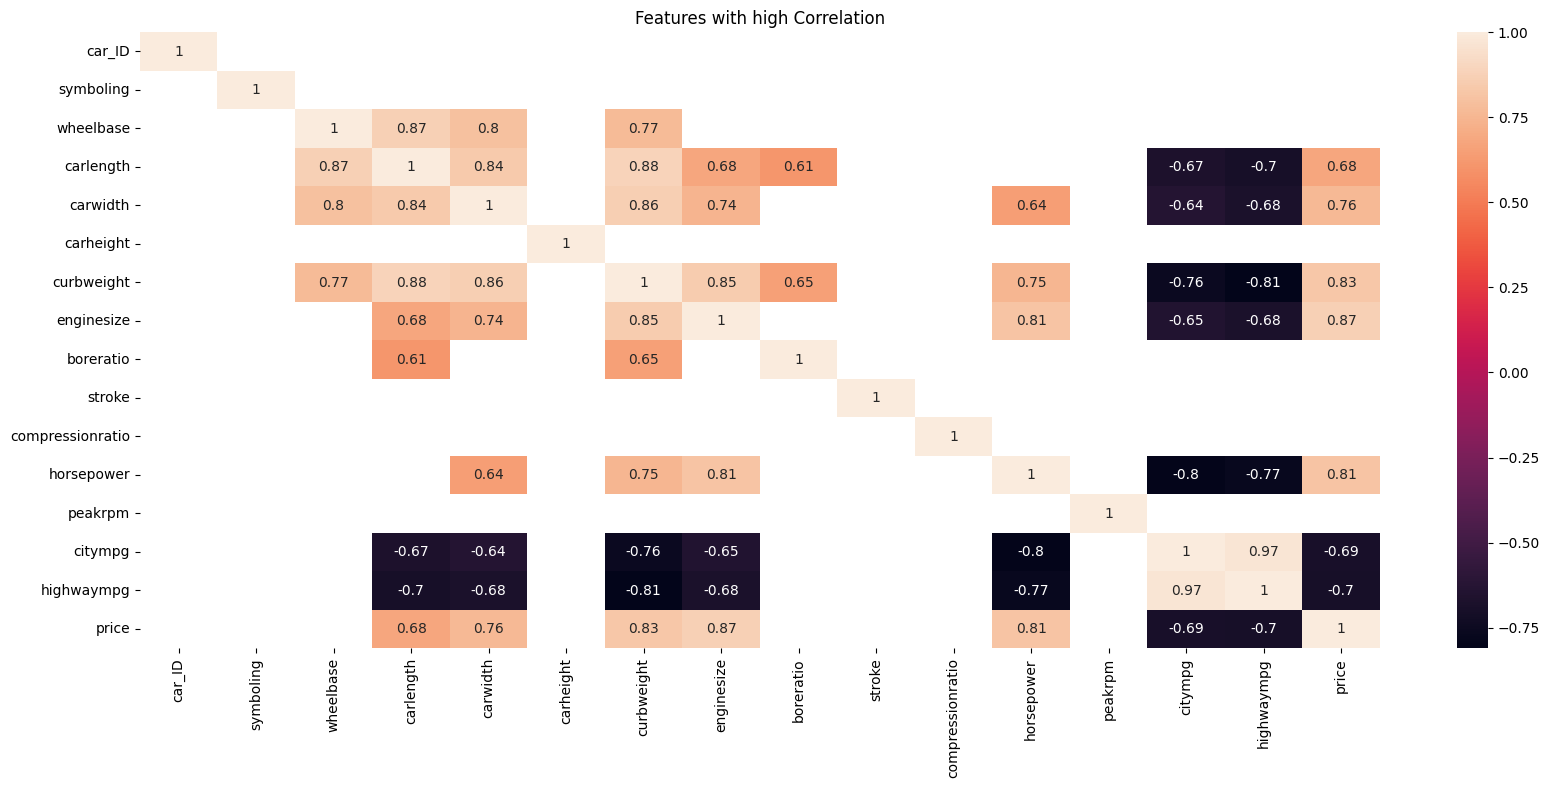

In [27]:
df_cor=cor.copy()                                                               # filtering out feature pairs with high correlation using threshod limit of 0.6
for i in cor.columns:
    df_cor[i] = np.where((cor[i] > 0.60) | (cor[i] < -0.60), round(cor[i],2), np.nan)

plt.figure(figsize=(20,8))
sns.heatmap(df_cor,annot=True)
_=plt.title("Features with high Correlation")

* **High corelation with Target variable:**

* **Positve**
1. Carlength
2. Carwidth
3. Curbweight
4. EngineSize
5. Horsepower
* **Negative**
6. Citympg
7. highwaympg

* **High positive corelation in Features:**
1. Carlength with Wheelbase,Carwidth,Curbweight,EngineSize,Boreratio.
2. Carwidth with Wheelbase,Carlength,Curbweight,EngineSize,Horsepower.
3. CurbWeight with Carlength,Carwidth,EngineSize,Boreratio,Horsepower.
4. Enginesize with Carlength,Carwidth,Curbweight,Horsepower.
5. Boreratio with Carlength,Curbweight.
6. Horsepower with Carwidth,CurbWeight,EngineSize.
7. Citympg with Highwaympg

* **High Negative corelation in Features:**
1. citympg & highwaympg with Carlength,Carwidth,Curbweight,EngineSize,Horsepower


##j)Transform features and target using centering and scaling.

In [28]:
from sklearn.model_selection import train_test_split #import the train test split class to split our dataset
from sklearn.preprocessing import StandardScaler #import the dtsnderdscaler class to scaling the features and target variable
scaler_x=StandardScaler()
scaler_y=StandardScaler()
X=df.drop(columns=["price"]) #drop our target variable from our dataset
Y=df["price"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [29]:
x_train[numerical_col[1:15]]=scaler_x.fit_transform(x_train[numerical_col[1:15]])
x_test[numerical_col[1:15]]=scaler_x.transform(x_test[numerical_col[1:15]])

y_train = pd.DataFrame(y_train) #transforming tha target ariable using standerd scaling
y_test = pd.DataFrame(y_test)
y_train["price"]=scaler_y.fit_transform(y_train)
y_test["price"]=scaler_y.transform(y_test)

In [30]:
x_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
43,44,-0.660732,isuzu MU-X,gas,std,four,sedan,rwd,front,-0.699215,...,four,-0.312490,2bbl,-0.005899,0.002994,-0.371790,-0.637450,-0.728900,-0.242250,-0.321260
78,79,0.954391,mitsubishi outlander,gas,std,two,hatchback,fwd,front,-0.800162,...,four,-0.795513,2bbl,-1.252884,0.002994,-0.124148,-0.910288,0.818563,0.821314,0.991318
143,144,-0.660732,subaru baja,gas,std,four,sedan,fwd,front,-0.211306,...,four,-0.388757,mpfi,1.131058,-1.868418,-0.234211,-0.200908,0.155365,0.061625,0.116266
21,22,0.146829,dodge rampage,gas,std,two,hatchback,fwd,front,-0.800162,...,four,-0.846358,2bbl,-1.252884,0.002994,-0.121397,-0.910288,0.818563,1.732941,1.428844
128,129,1.761953,porsche boxter,gas,std,two,convertible,rwd,rear,-1.506789,...,six,1.797560,mpfi,1.571171,-1.043728,-0.096632,2.882165,1.702827,-1.305815,-0.904628


In [31]:
y_train.head()

,price
43,-0.760141
78,-0.774779
143,-0.359492
21,-0.913208
128,3.056182


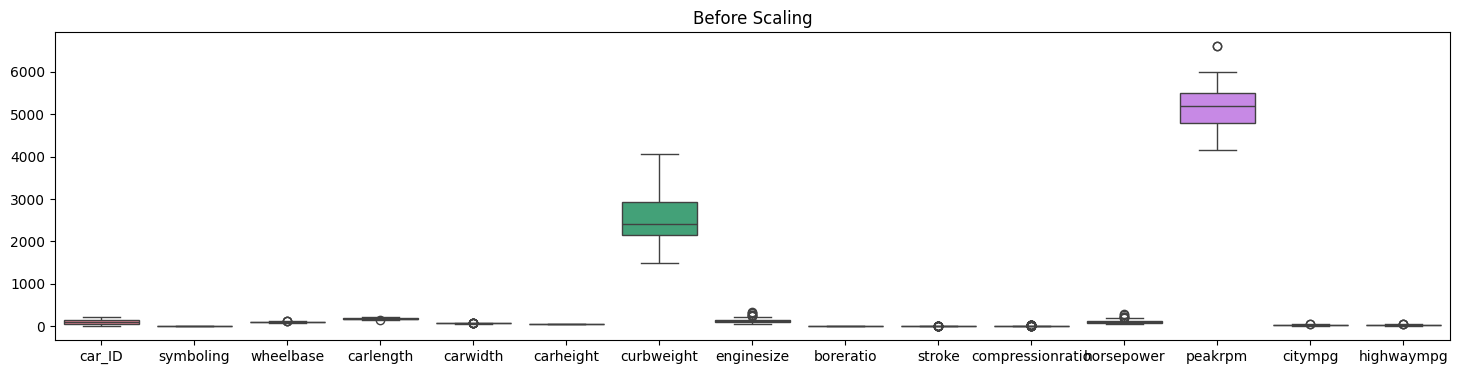

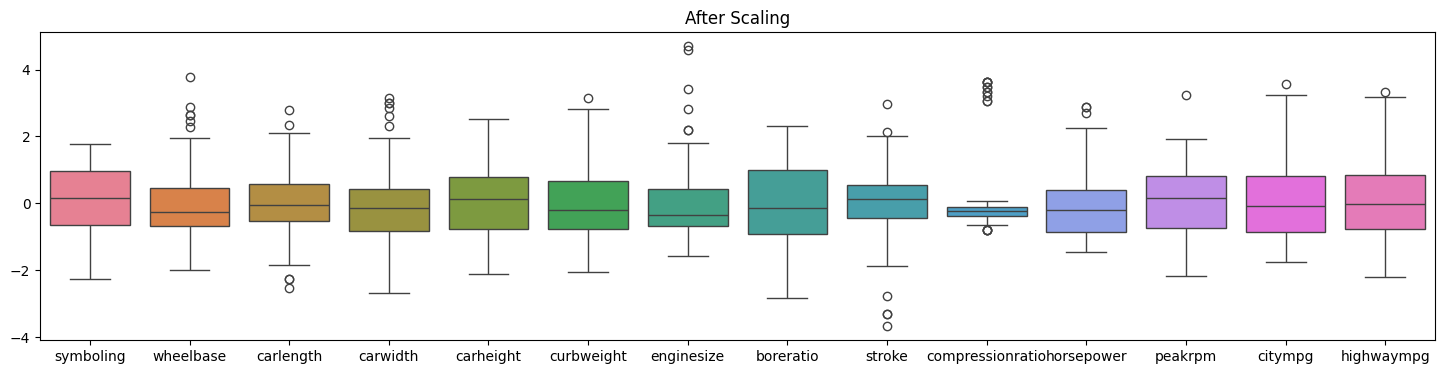

In [32]:
plt.figure(figsize=(18,4))                                            #Plotting Bar graph to visualize Data before and after scaling.
sns.boxplot(df.drop(["price"],axis=1))
plt.title("Before Scaling")

plt.figure(figsize=(18,4))
sns.boxplot(x_train.drop(["car_ID"],axis=1))
_=plt.title("After Scaling")

In [33]:
round(x_train.describe()[1:3],3)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
mean,106.315,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000
std,59.819,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004


1. **After Centing and Scaling, Datapoints are on the same scale with mean 0 and std deviation 1.0.**

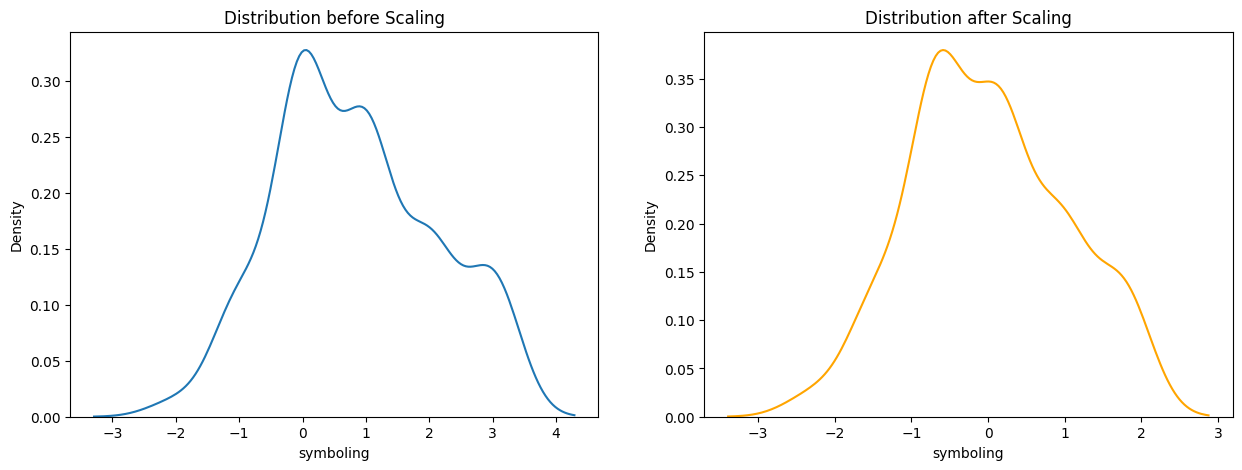

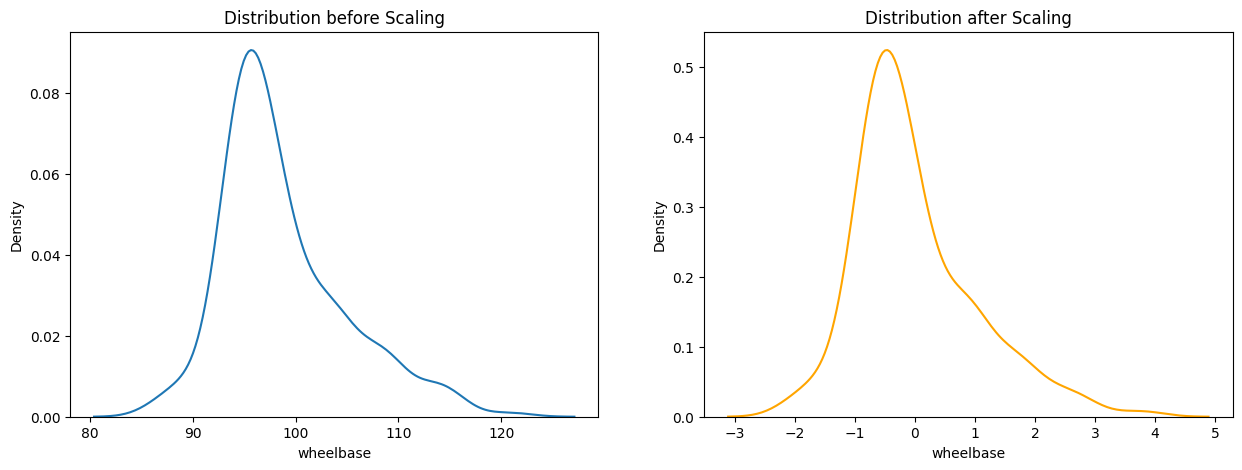

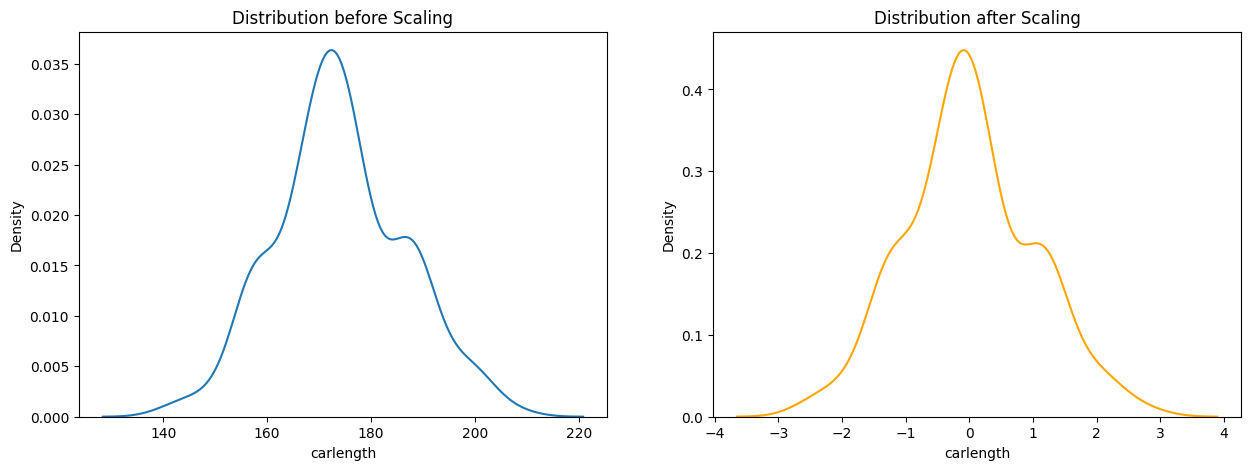

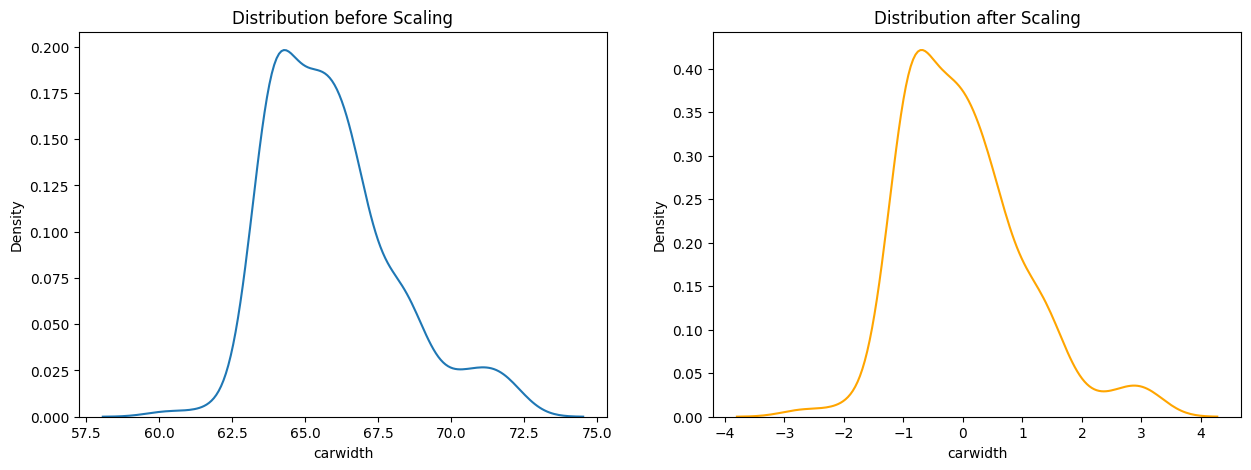

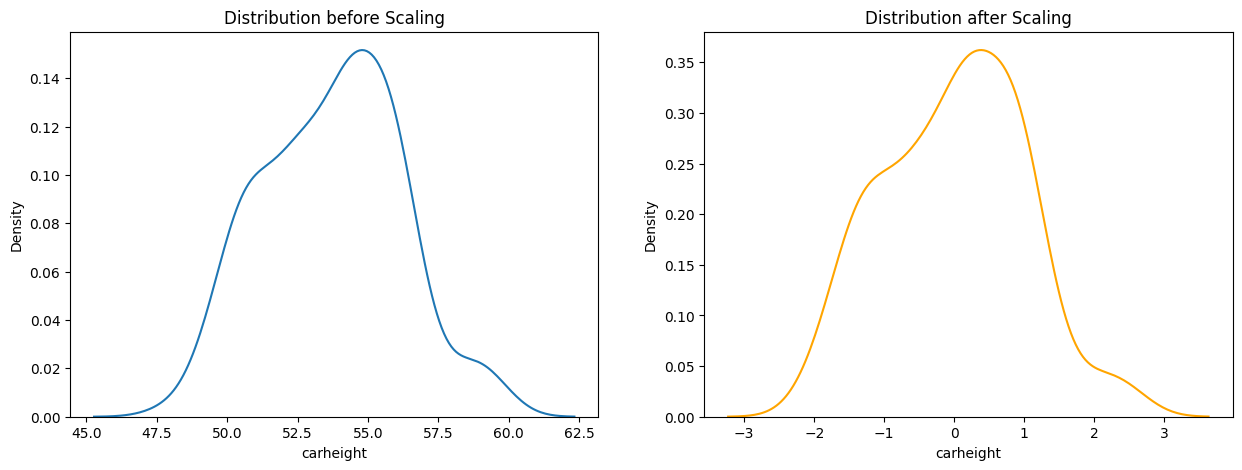

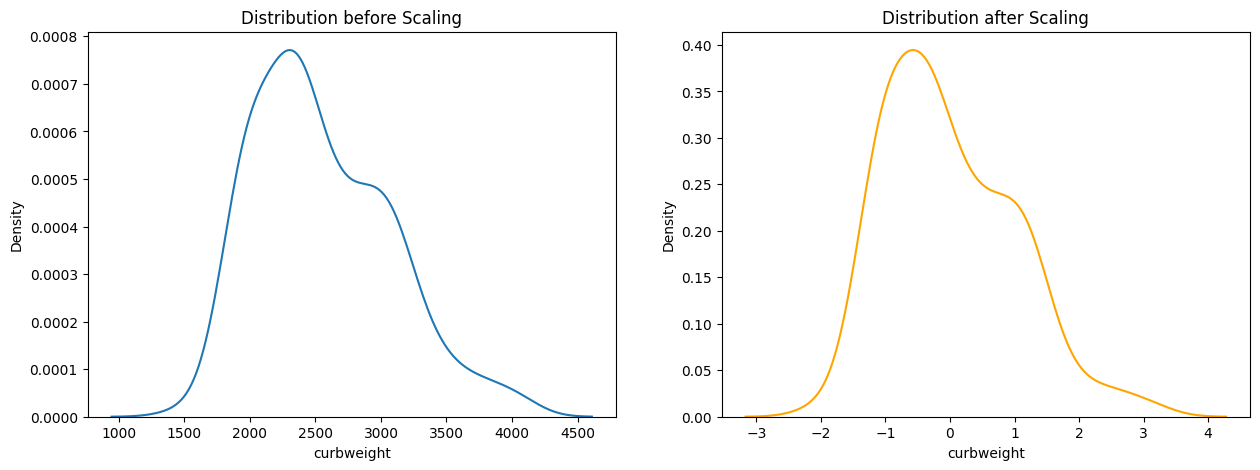

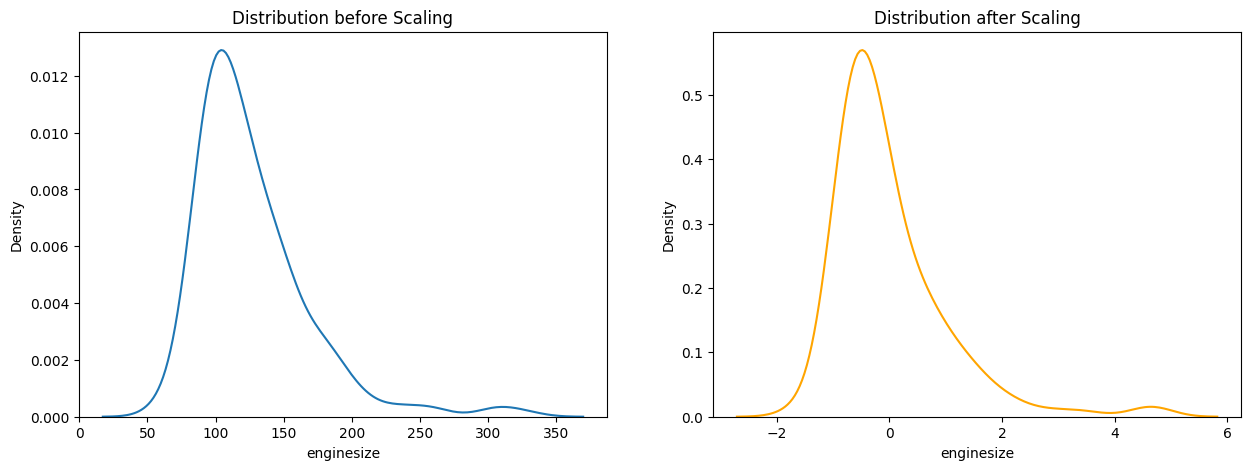

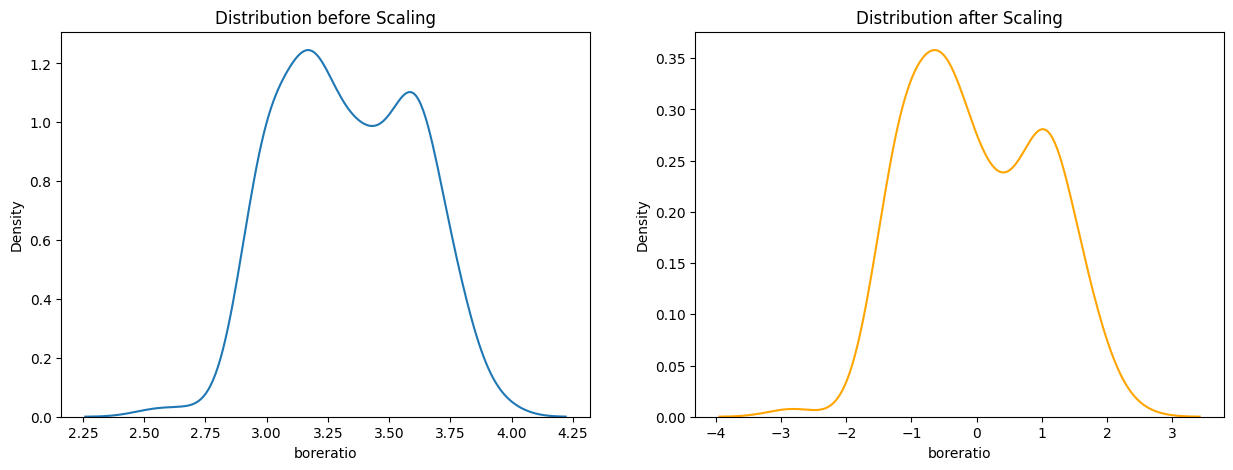

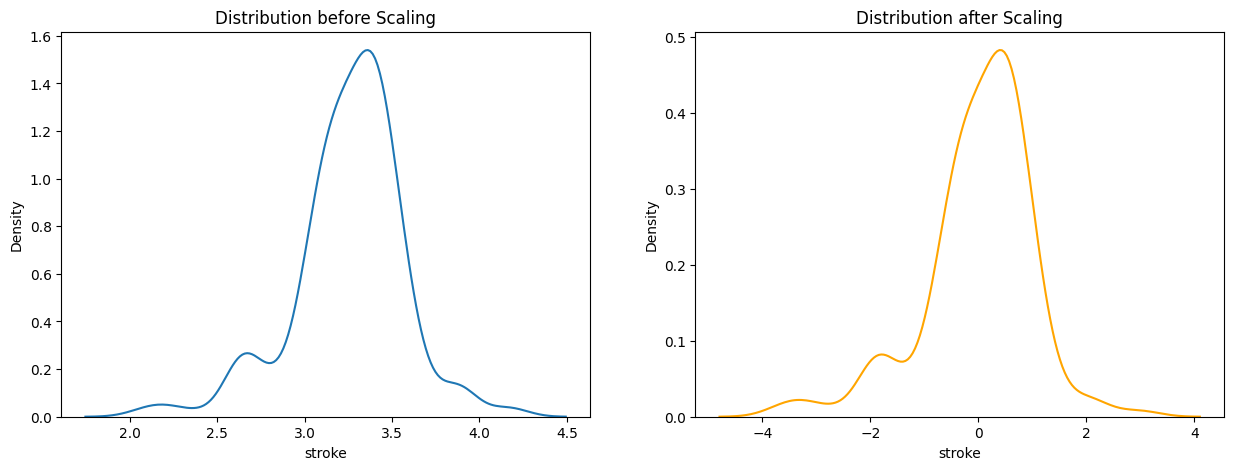

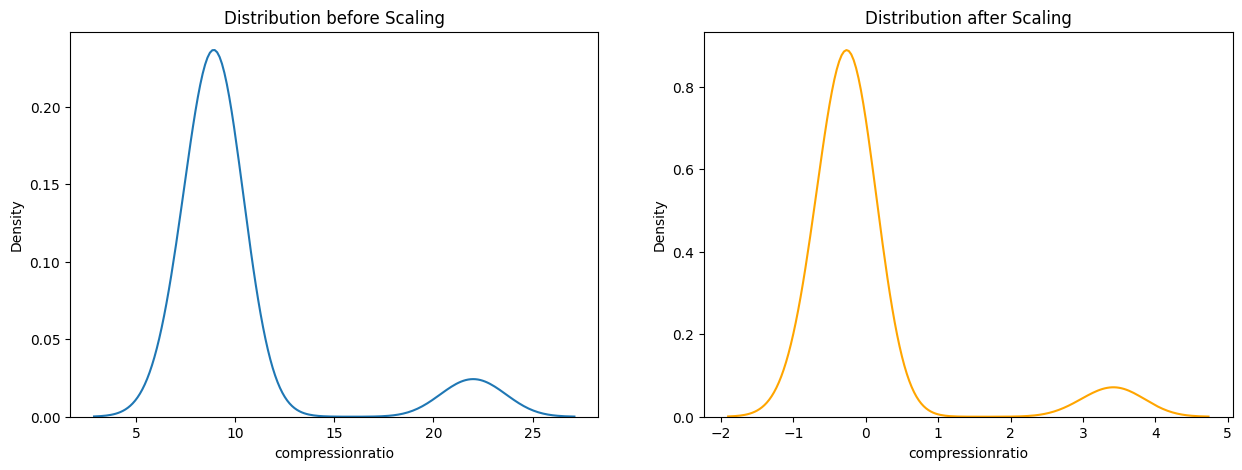

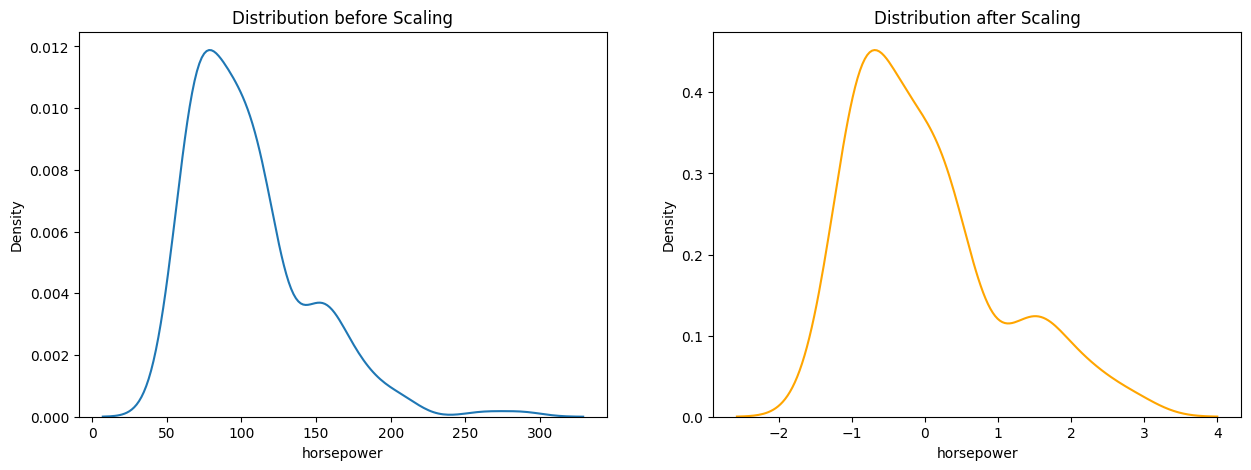

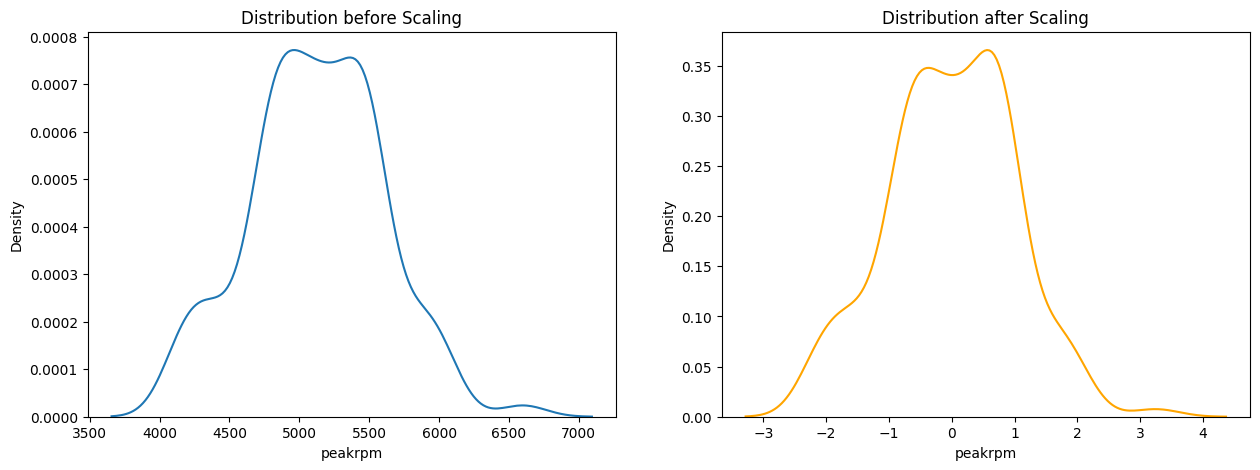

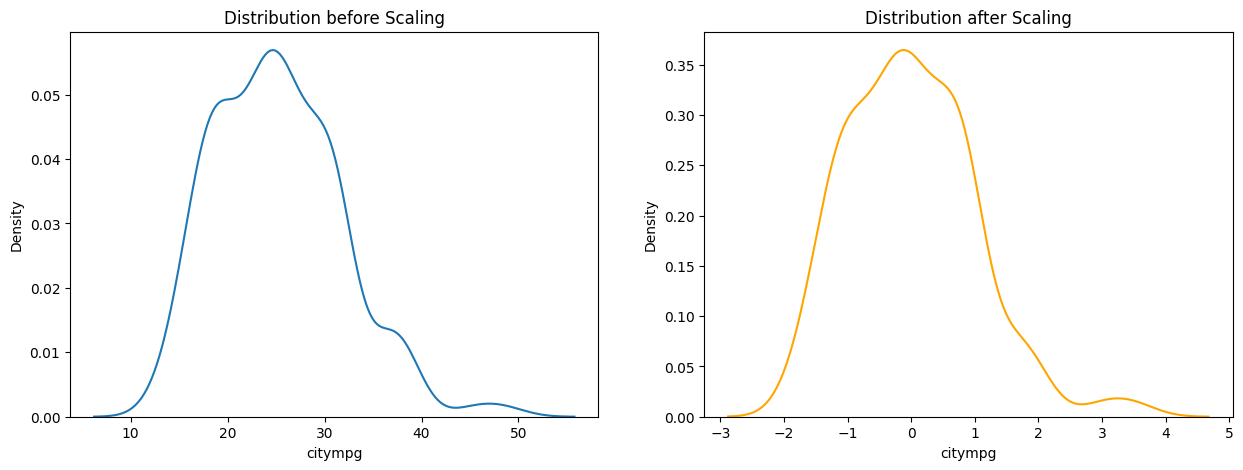

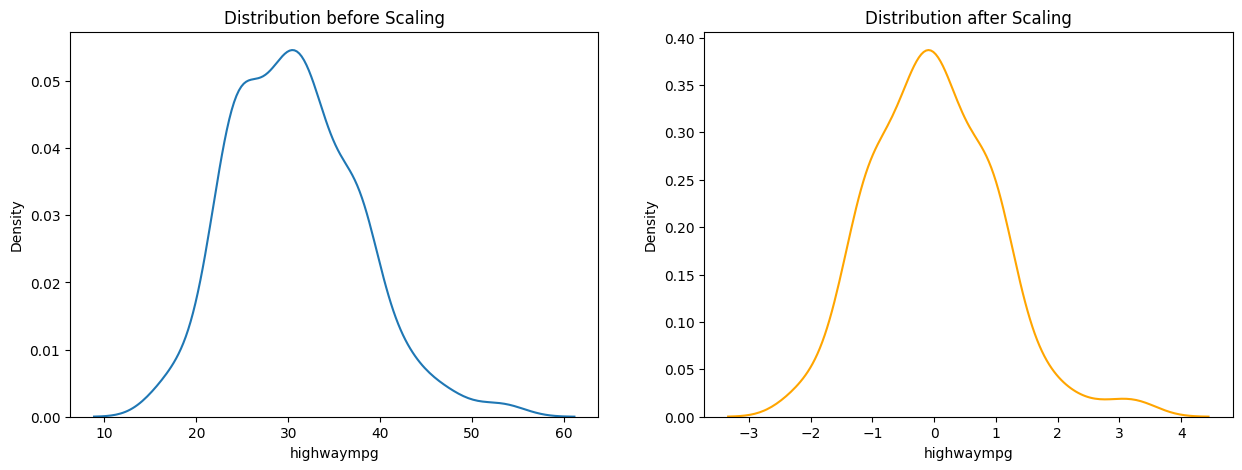

In [34]:
for i in df_num_col[1:15]:
  plt.figure(figsize=(15,5))
  plt.subplot(121)
  sns.distplot(df[i],hist=False)
  plt.title("Distribution before Scaling")

  plt.subplot(122)
  sns.distplot(x_train[i],hist=False,color="orange")
  plt.title("Distribution after Scaling")

  plt.show()


1. **There is no change in data distrubution after scaling featues.**